In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from matplotlib.dates import DateFormatter
from scipy import stats
from scipy.stats import pearsonr
from matplotlib.patches import Patch

## World Happiness Report

1. The happiest and unhappiest countries in the world. Discuss your findings in fewer than 100 words.

## Methodology:
After the 'World Happiness Report' dataset is loaded into the dataframe (DF), the dataset is sorted twice- once in descending order to find the happiest countries, and once in ascending order to identify the unhappiest countries. The top 10 countries are selected from each category by extracting their 'Country Name' and 'Ladder Score' columns. These are combined into a single DF  is cha=using pd.concat. A horizontal bar chart is created to display the happiness scores, and the exact ladder scores are annotated on the bars.

In [259]:
df= pd.read_csv(r"D:\world-happiness-report-2021.csv")
happiest= df.sort_values('Ladder score', ascending= False) #descending
unhappiest= df.sort_values('Ladder score', ascending= True) 
top_happiest= happiest[['Country name','Ladder score']].head(10)
top_unhappiest=unhappiest[['Country name','Ladder score']].head(10)
top_happiest_and_unhappiest_countries= pd.concat([top_happiest, top_unhappiest])

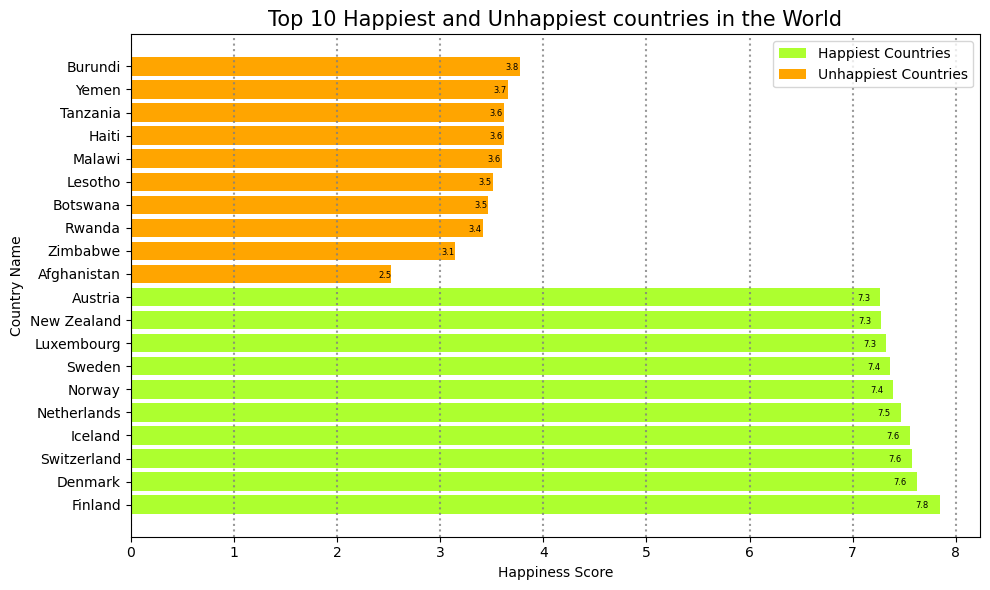

In [261]:
plt.figure(figsize=(10,6))
colors= ['greenyellow']*10+['orange']*10

bars= plt.barh(top_happiest_and_unhappiest_countries['Country name'],
         top_happiest_and_unhappiest_countries['Ladder score'],
         color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_width()/1.022,
             bar.get_y()+bar.get_height()/2.3,
             f'{top_happiest_and_unhappiest_countries["Ladder score"].iloc[i]:.1f}',
             ha='center',
             va='center',
             fontsize=6,
            color='black')
    
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.gca().set_title('Top 10 Happiest and Unhappiest countries in the World', fontsize=15)
plt.grid(True, color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
handles= [Patch(facecolor='greenyellow', label='Happiest Countries'),
          Patch(facecolor='orange', label='Unhappiest Countries')
         ]
plt.legend(handles=handles)
          
plt.tight_layout()
plt.show()


The Gallup World Poll provides insights into happiness rankings by analysing responses to the life evaluation question, using the Cantril Ladder. This tool asks individuals to envision a ladder score where a score of 10 represents the best possible life for them, and 0 signifies the worst. Participants then rate their current life on this scale. In 2021, Finland scored the highest, with a ladder score of 7.8, followed very closely by Denmark at 7.6. All five Nordic countries were featured in the top ten countries. Burundi scored the least, with a score of 3.8, with a difference of 4.  

2. Happiness Index score trends over the years for the top 10 happiest and the unhappiest countries. For the top 10 happiest countries, analyse their happiness index score trends over the years using the historical data, and compare their 2024 score with their average historical score. Repeat this exercise for the top 10 unhappiest countries. Discuss your findings in fewer than 100 words.

## Methodology:
The 'Ladder score' column in the 2021 dataset is renamed to 'Life Ladder' for consistency. A new column for the year (2021) is added to the 2021 dataset, and both are concatenated into one DF. This dataset is sorted by country name and year. For the year 2023, similar procedure is applied. Only the relevant columns, including the 'Country name' and 'Ladder score 2023' are kept, and the index is reset. The other columns are removed, which are not required for analysis. The data for the happiest countries is merged with their historical average scores and the 2023 scores. 

A line plot is created to show the happiness trends over time, where the x-axis represents the year, and the y-axis represents the 'Life ladder' score. Mutliple subplots are generated, with each subplot showing a detailed trend for one country. 

A similar procedure is applied for the unhappiest countries

In [266]:
df2021= pd.read_csv(r"D:\world-happiness-report-2021.csv")
dfhistorical= pd.read_csv(r"D:\world-happiness-report [historical].csv")
df2021a= df2021.rename(columns={"Ladder score": "Life Ladder"})
df2021a['year']=2021
dfnew= pd.concat([df2021a,dfhistorical])
dfnew= dfnew.sort_values(['Country name', 'year'])

Top 10 Happiest countries

In [269]:
df2023=pd.read_excel(r"D:\DataForTable2.1.xlsx")
df2023= df2023[df2023['year']==2023]
df2023= df2023.rename(columns={"Life Ladder": "Ladder score 2023"})
df2023_final= df2023[['Country name','Ladder score 2023']].reset_index()
df2023_final= df2023_final.drop(columns='index')
df2023_final

,Country name,Ladder score 2023
0,Afghanistan,1.445909
1,Albania,5.444691
2,Argentina,6.393229
3,Armenia,5.679090
4,Australia,7.024582
...,...,...
133,Venezuela,5.765363
134,Vietnam,6.325115
135,Yemen,3.531574
136,Zambia,3.685568


In [271]:
happiest_countries= dfnew[dfnew['Country name'].isin(["Finland","Denmark","Switzerland","Iceland","Netherlands","Norway","Sweden","Luxembourg","New Zealand","Austria"])]
filtered_happiest= happiest_countries.drop(columns=['Regional indicator','Generosity','Perceptions of corruption','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','Log GDP per capita','Healthy life expectancy at birth','Positive affect', 'Negative affect'])
average_historical_scores= filtered_happiest.groupby('Country name')['Life Ladder'].mean().reset_index()
merged_1= pd.merge(filtered_happiest,average_historical_scores, on='Country name')
final_happiest= pd.merge(merged_1,df2023_final, on='Country name')
final_happiest= final_happiest.sort_values(by=['Country name','year'])
final_happiest= final_happiest.rename(columns={'Life Ladder_y': 'Average Life Score'})
final_happiest

,Country name,Life Ladder_x,year,Average Life Score,Ladder score 2023
0,Austria,7.122,2006,7.244071,6.635664
1,Austria,7.181,2008,7.244071,6.635664
2,Austria,7.303,2010,7.244071,6.635664
3,Austria,7.471,2011,7.244071,6.635664
4,Austria,7.401,2012,7.244071,6.635664
...,...,...,...,...,...
128,Switzerland,7.474,2017,7.550364,6.968833
129,Switzerland,7.509,2018,7.550364,6.968833
130,Switzerland,7.694,2019,7.550364,6.968833
131,Switzerland,7.508,2020,7.550364,6.968833


Happiness index score trends over the years

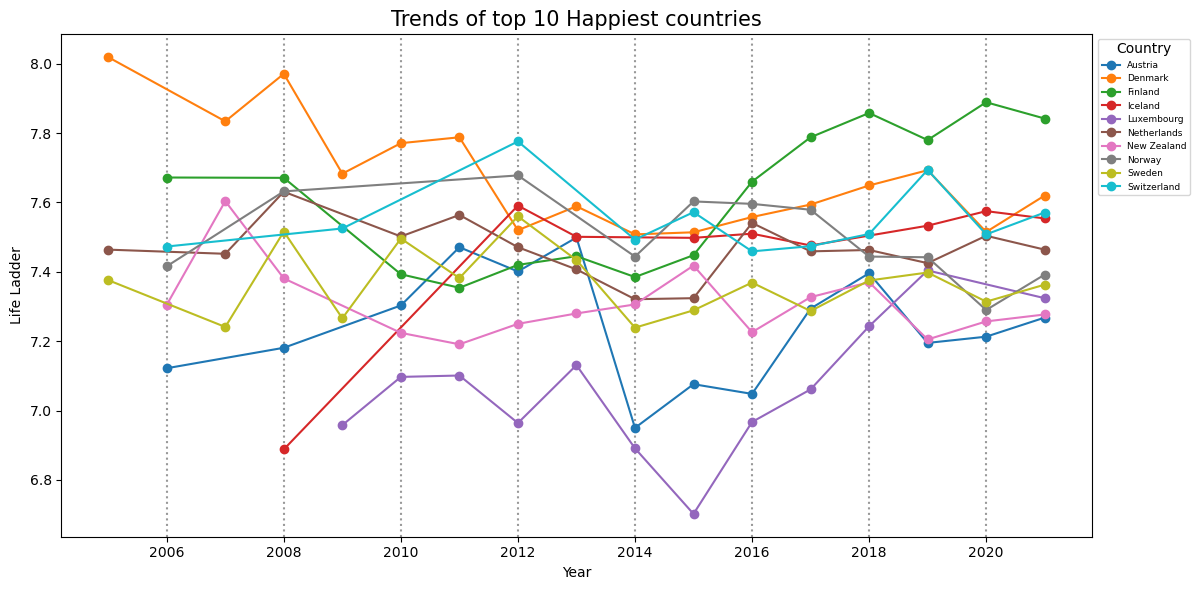

In [274]:
plt.figure(figsize=(12,6))
    
for country in final_happiest['Country name'].unique():
    country_data= final_happiest[final_happiest['Country name']== country]
    plt.plot(country_data['year'], country_data['Life Ladder_x'], marker='o', linestyle='-', label=country) 
    
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.legend(title='Country', bbox_to_anchor=(1.1,1),loc='upper right', fontsize=6.5)
plt.gca().set_title('Trends of top 10 Happiest countries', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Life Ladder')

plt.tight_layout()
plt.show()


Happiness scores and average historical score of top 10 happiest countries

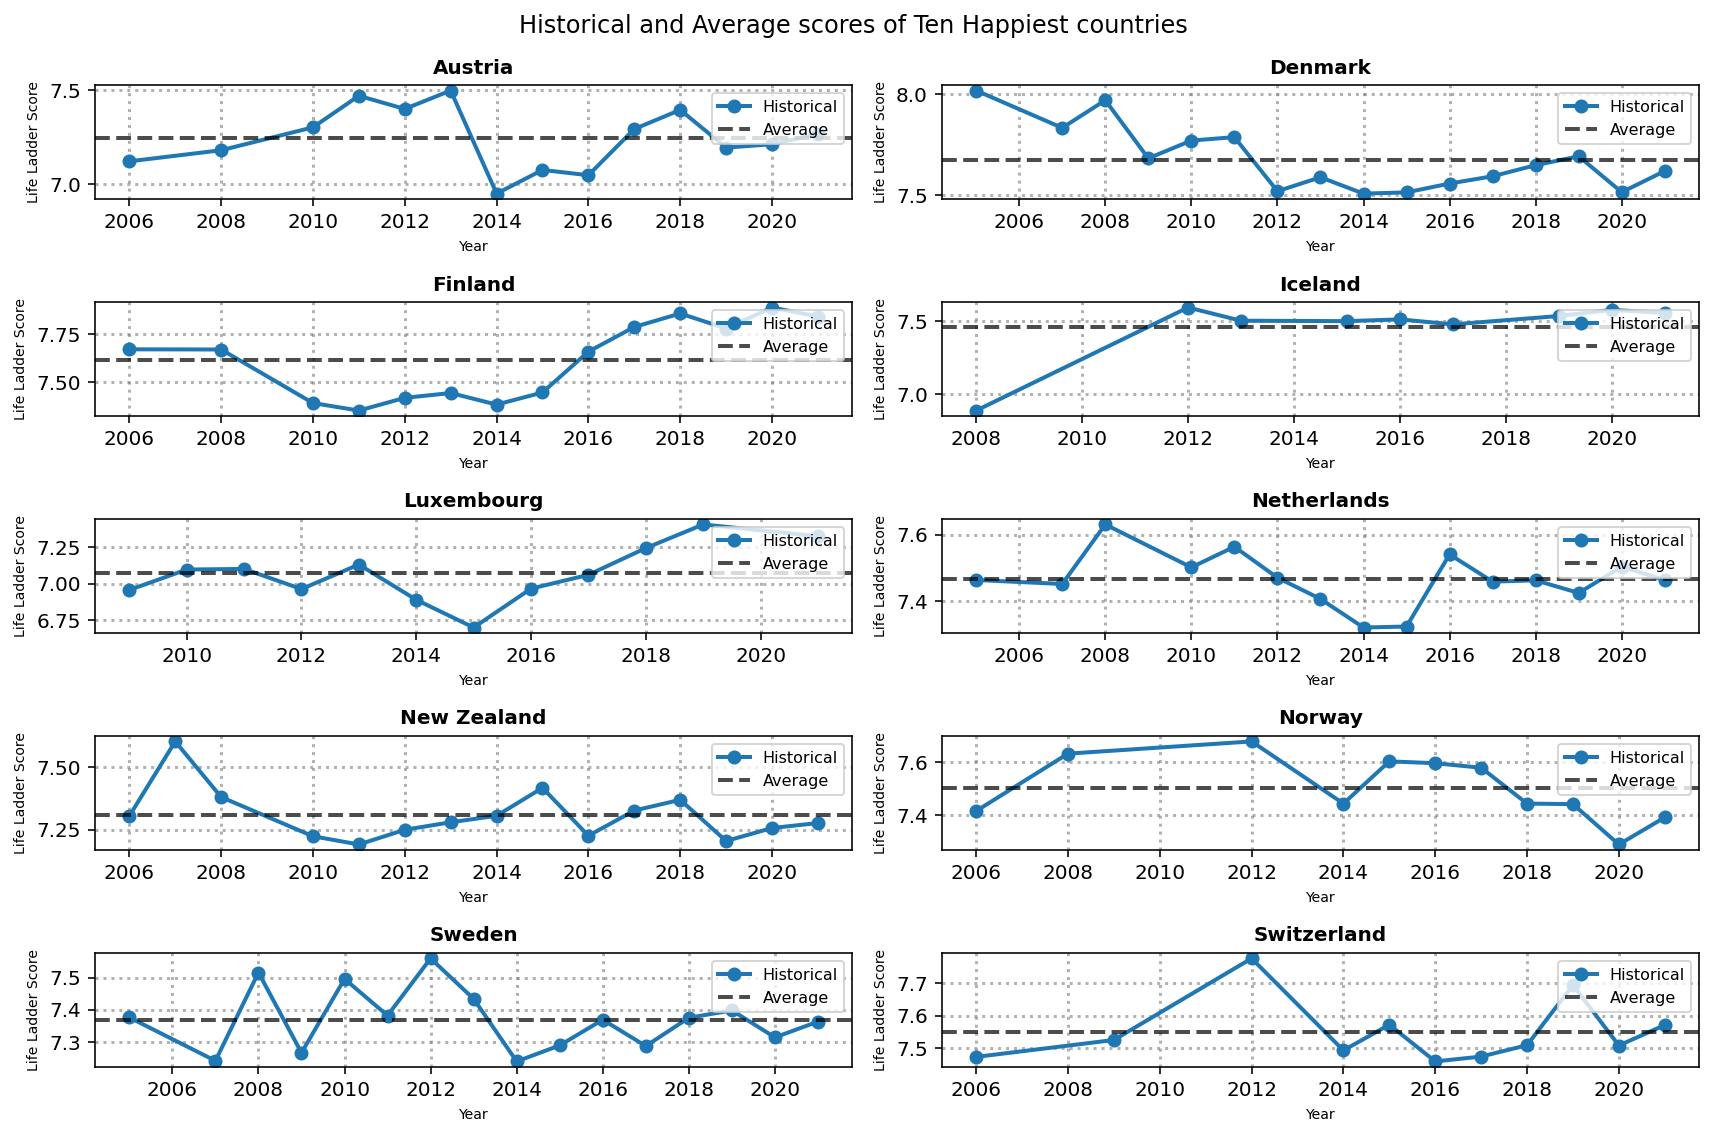

In [277]:
n_countries = len(final_happiest['Country name'].unique())

fig, axes = plt.subplots(5,2, figsize=(12, 8), dpi=144)

axes = axes.flatten()

for i, country in enumerate(final_happiest['Country name'].unique()):
    country_data = final_happiest[final_happiest['Country name'] == country]
    
    ax = axes[i]
    
    ax.plot(country_data['year'], country_data['Life Ladder_x'], marker='o', linestyle='-', label='Historical', linewidth=2, markersize=6)
    
    average_score = country_data['Average Life Score'].iloc[0] 
    ax.axhline(y=average_score, linestyle='--', color='black', alpha=0.7, linewidth=2, label='Average')
    
    score_2023 = country_data[country_data['year'] == 2023]['Life Ladder_x'].values

    ax.set_title(f'{country}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Year', fontsize=7)
    ax.set_ylabel('Life Ladder Score', fontsize=7)
    ax.grid(True, color='grey', linestyle=':', linewidth=1.5, alpha=0.6)
    ax.legend(fontsize=8, loc='upper right')
    
plt.suptitle("Historical and Average scores of Ten Happiest countries ", fontsize=12)

plt.tight_layout()
plt.show()




Bottom 10 unhappiest countries

In [280]:
unhappiest_countries= dfnew[dfnew['Country name'].isin(["Afghanistan","Zimbabwe","Rwanda","Botswana","Lesotho","Malawi","Haiti","Tanzania","Yemen","Burundi"])]
filtered_unhappiest= unhappiest_countries.drop(columns=['Regional indicator','Generosity','Perceptions of corruption','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','Log GDP per capita','Healthy life expectancy at birth',	'Positive affect', 'Negative affect'])
average_historical_scores_for_unhappiest= filtered_unhappiest.groupby('Country name')['Life Ladder'].mean().reset_index()
merged_2= pd.merge(filtered_unhappiest,average_historical_scores_for_unhappiest, on='Country name')
final_unhappiest1= pd.merge(merged_2,df2023_final, on='Country name')
final_unhappiest1= final_unhappiest1.sort_values(by=['Country name','year'])
final_unhappiest1= final_unhappiest1.rename(columns={'Life Ladder_y':'Average Life Score'})
final_unhappiest1

,Country name,Life Ladder_x,year,Average Life Score,Ladder score 2023
0,Afghanistan,3.724,2008,3.512231,1.445909
1,Afghanistan,4.402,2009,3.512231,1.445909
2,Afghanistan,4.758,2010,3.512231,1.445909
3,Afghanistan,3.832,2011,3.512231,1.445909
4,Afghanistan,3.783,2012,3.512231,1.445909
...,...,...,...,...,...
79,Zimbabwe,3.638,2017,3.836500,3.572386
80,Zimbabwe,3.616,2018,3.836500,3.572386
81,Zimbabwe,2.694,2019,3.836500,3.572386
82,Zimbabwe,3.160,2020,3.836500,3.572386


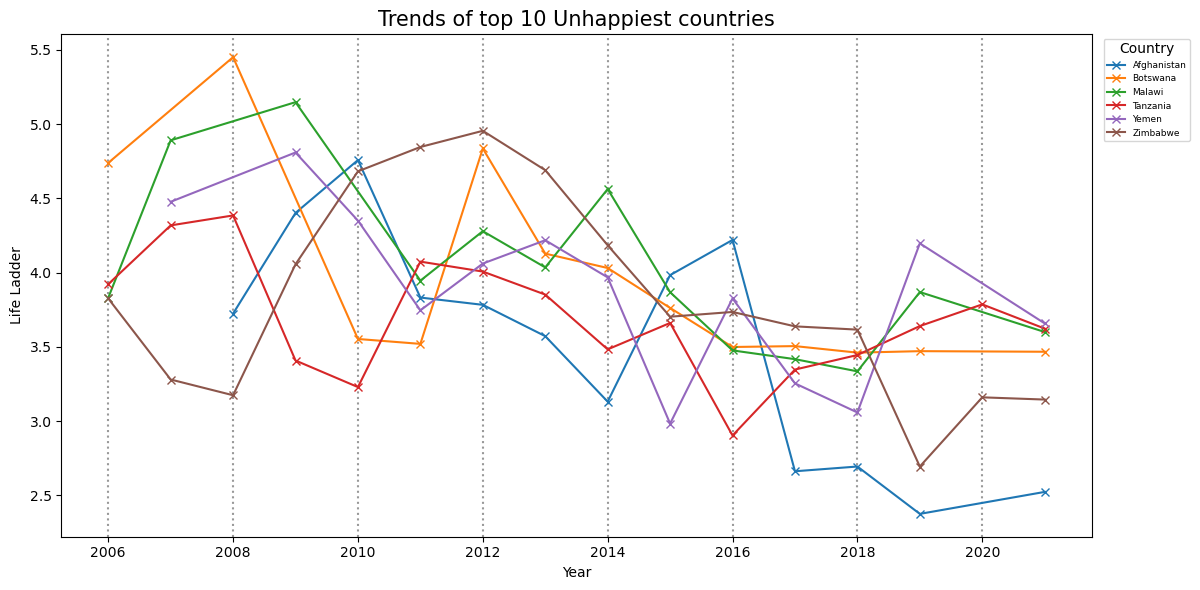

In [282]:
plt.figure(figsize=(12,6))
    
for country in final_unhappiest1['Country name'].unique():
    country_data= final_unhappiest1[final_unhappiest1['Country name']== country]
    plt.plot(country_data['year'], country_data['Life Ladder_x'], marker='x', linestyle='-', label=country) 
    
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.legend(title='Country', bbox_to_anchor=(1.1,1),loc='upper right', fontsize=6.5)
plt.gca().set_title('Trends of top 10 Unhappiest countries', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Life Ladder')

plt.tight_layout()
plt.show()


Happiness scores and average historical score of top 10 unhappiest countries

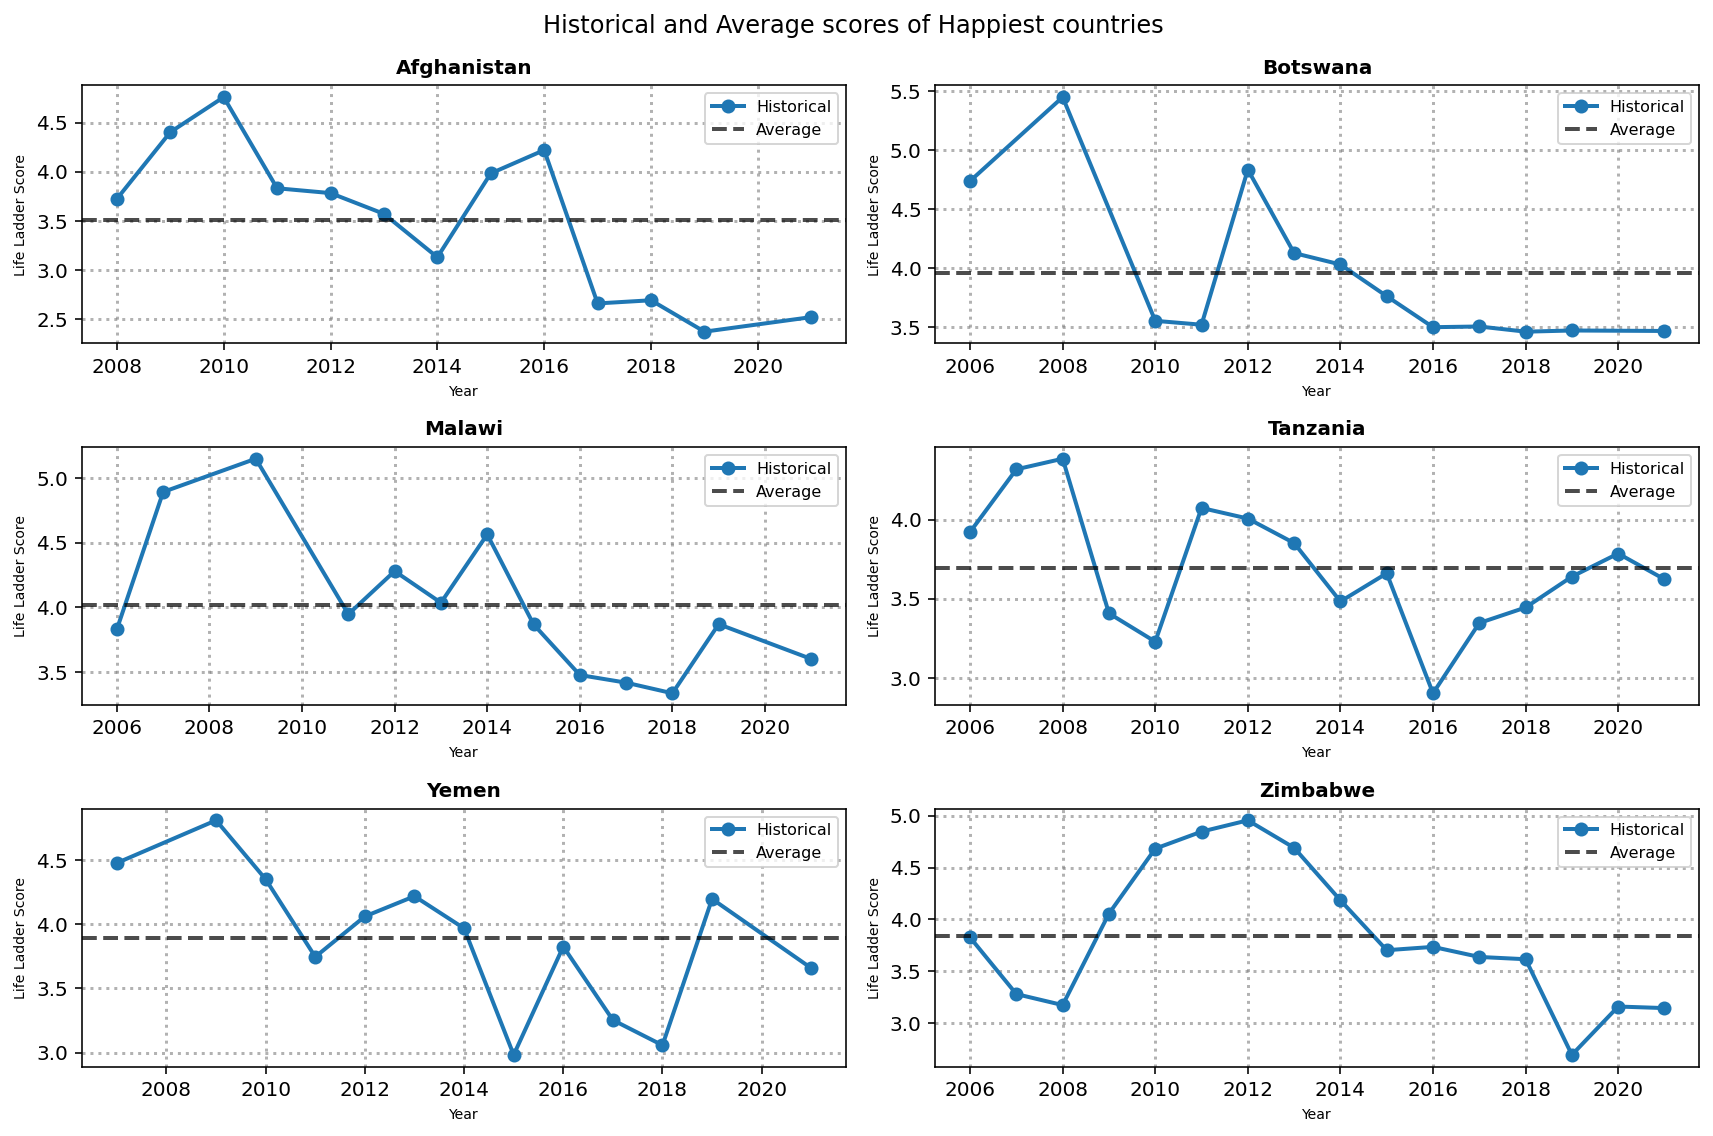

In [285]:
n_countries = len(final_unhappiest1['Country name'].unique())

fig, axes = plt.subplots(3,2, figsize=(12, 8), dpi=144)

axes = axes.flatten()

for i, country in enumerate(final_unhappiest1['Country name'].unique()):
    country_data = final_unhappiest1[final_unhappiest1['Country name'] == country]
    
    ax = axes[i]
    
    ax.plot(country_data['year'], country_data['Life Ladder_x'], marker='o', linestyle='-', label='Historical', linewidth=2, markersize=6)
    
    average_score = country_data['Average Life Score'].iloc[0] 
    ax.axhline(y=average_score, linestyle='--', color='black', alpha=0.7, linewidth=2, label='Average')
    
    score_2023 = country_data[country_data['year'] == 2023]['Life Ladder_x'].values
    
    ax.set_title(f'{country}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Year', fontsize=7)
    ax.set_ylabel('Life Ladder Score', fontsize=7)
    ax.grid(True, color='grey', linestyle=':', linewidth=1.5, alpha=0.6)
    ax.legend(fontsize=8, loc='upper right')
    
plt.suptitle("Historical and Average scores of Happiest countries ", fontsize=12)

plt.tight_layout()
plt.show()


While analyzing the historical trends of the top happiest countries, it was observed that for Denmark, New Zealand, Norway and Sweden, the happiness score tended to remain lower than their average happiness score each year. Among the top unhappiest countries, which had data available for their historical trends as well: Afghanistan, Botswana, Malawi, Tanzania, Yemen and Zimbabwe, the happiness score remained below the average happiness score as well. For both happiest and unhappiest countries, a dip after 2016 has been observed. The COVID-19 pandemic had a universal impact, with happiness scores dropping across all countries, reflecting a widespread deterioration in mental, social, and physical well-being.

3. It is often suggested that happier countries tend to have longer life expectancies and higher GDPs. Use
an appropriate plot (e.g., scatter plot or correlation matrix) to test this hypothesis by comparing happiness
scores with life expectancy and GDP data. Discuss your findings in fewer than 100 words.

## Methodology:
A correlation matrix is created to explore the relationshops between 'Ladder score', 'Logged GDP per capita' and 'Healthy life expectancy' using the 2021 dataset. The correlation values are rounded to two decimal places for clarity. A heatmap is then generated to represent correlations between these variables, with annotations showing the exact correlation values

In [290]:
filtered_happiest1= happiest_countries.drop(columns=['Regional indicator','Generosity','Perceptions of corruption','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support','Standard error of ladder score','upperwhisker','lowerwhisker','Social support','Freedom to make life choices','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual','Log GDP per capita','Healthy life expectancy at birth',	'Positive affect', 'Negative affect']).reset_index()
filtered_happiest1= filtered_happiest1.drop(columns='index')
filtered_happiest1

,Country name,Life Ladder,Logged GDP per capita,Healthy life expectancy,year
0,Austria,7.122,NaN,NaN,2006
1,Austria,7.181,NaN,NaN,2008
2,Austria,7.303,NaN,NaN,2010
3,Austria,7.471,NaN,NaN,2011
4,Austria,7.401,NaN,NaN,2012
...,...,...,...,...,...
128,Switzerland,7.474,NaN,NaN,2017
129,Switzerland,7.509,NaN,NaN,2018
130,Switzerland,7.694,NaN,NaN,2019
131,Switzerland,7.508,NaN,NaN,2020


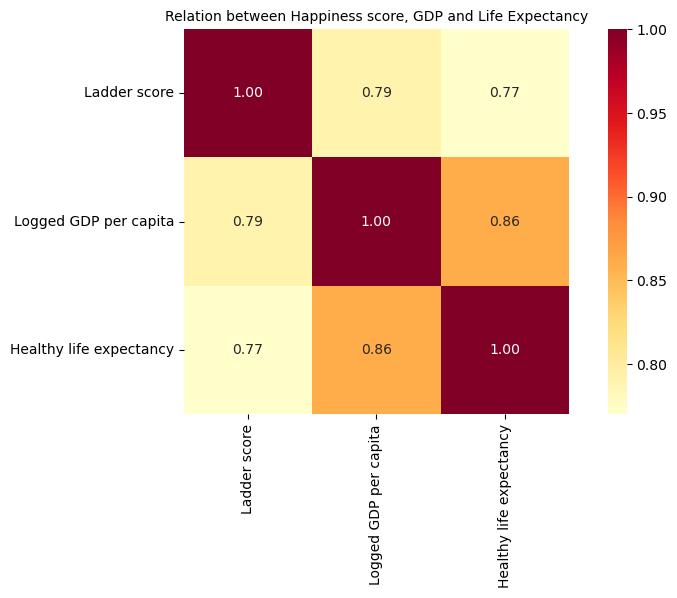

In [292]:
df1_matrix= df2021[['Ladder score', 'Logged GDP per capita', 'Healthy life expectancy']].corr()
df1_matrix
df1_matrix= df1_matrix.round(2)
df1_matrix.style.background_gradient(cmap="Greens")
plt.figure(figsize=(10,5))
plt.title('Relation between Happiness score, GDP and Life Expectancy', fontsize= "10")
sns.heatmap(df1_matrix, cmap= "YlOrRd", annot= True, fmt= "0.2f",square= True)
plt.show()

There is a strong correlation between GDP of the country, healthy life expectancy and the happiness score of countries. The value closer to 1 indicates stronger positive relationship, where, as one variable increases, the other variable does as well. 
Wealthier nations have resources to invest in the wellbeing and health infrastructure of the citizens. The correlation is 0.86 between these parameters, suggesting countries with higher GDP have better health outcomes.
Similarly, the correlation of 0.79 between GDP and happiness score, is a reflection on how higher average national income tends to have, on average, higher happiness scores. 
Good health and well being of citizens, therefore, result in people rating their lives on a higher score. This is why there is a strong relation between healthy life expectancy and happiness score. 


4. Some suggest that people from certain continents or regions are happier than others. Use an
appropriate plot to examine and compare the average happiness scores across different continents or
regions. Discuss your findings in fewer than 100 words.

## Methodology:
The dataset is grouped by the 'Regional indicator' to calculate the average 'Ladder score' for each region. A bar chart is created to visually represent the average happiness scores, with each region's score displayed as a separate bar.

In [297]:
regional_happiest= df2021.groupby('Regional indicator')['Ladder score'].mean().reset_index()
regional_happiest

,Regional indicator,Ladder score
0,Central and Eastern Europe,5.984765
1,Commonwealth of Independent States,5.467000
2,East Asia,5.810333
3,Latin America and Caribbean,5.908050
4,Middle East and North Africa,5.219765
5,North America and ANZ,7.128500
6,South Asia,4.441857
7,Southeast Asia,5.407556
8,Sub-Saharan Africa,4.494472
9,Western Europe,6.914905


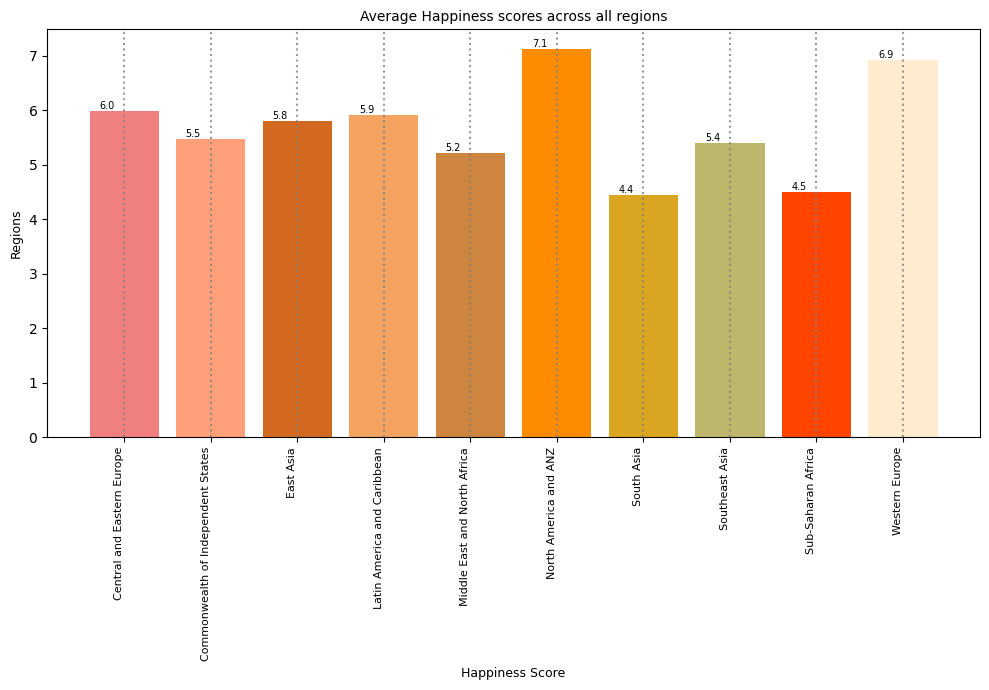

In [299]:
plt.figure(figsize=(10,7))
colors= ['lightcoral']+['lightsalmon']+['chocolate']+['sandybrown']+['peru']+['darkorange']+['goldenrod']+['darkkhaki']+['orangered']+['blanchedalmond']

bars= plt.bar(regional_happiest['Regional indicator'],
         regional_happiest['Ladder score'],
         color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_x()+bar.get_width()/4,
             bar.get_height(),
             f'{regional_happiest["Ladder score"].iloc[i]:.1f}',
             ha='center',
             va='bottom',
             fontsize=7,
             color='black')
    
plt.xlabel('Happiness Score',fontsize=9)
plt.ylabel('Regions',fontsize=9)
plt.gca().set_title('Average Happiness scores across all regions', fontsize=10)
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


A region wise analysis shows that on average, countries in North America and Australia and New Zealand (ANZ) tend to have the highest happiness score, because of which the mean is higher than the other regions. The gap in the happiness index between the happiest continent and the unhappiest continent- South Asia, has a difference of 2.6 points. The reason for growing unhappiness in South Asia could be the increasing political polarization, economic inequalities, and access to basic rights have impacted them reporting lower happiness scores.

5. Some argue that corruption and lack of freedom negatively impact happiness. Use an appropriate plot
to analyse the relationship between happiness scores and measures of corruption and freedom. Discuss your findings in fewer than 100 words.

## Methodology:
A correlation matrix is created to explore the relationshops between 'Ladder score', 'Freedom to make life choices' and 'Perception of corruption' using the 2021 dataset. The correlation values are rounded to two decimal places for clarity. A heatmap is then generated to represent correlations between these variables, with annotations showing the exact correlation values


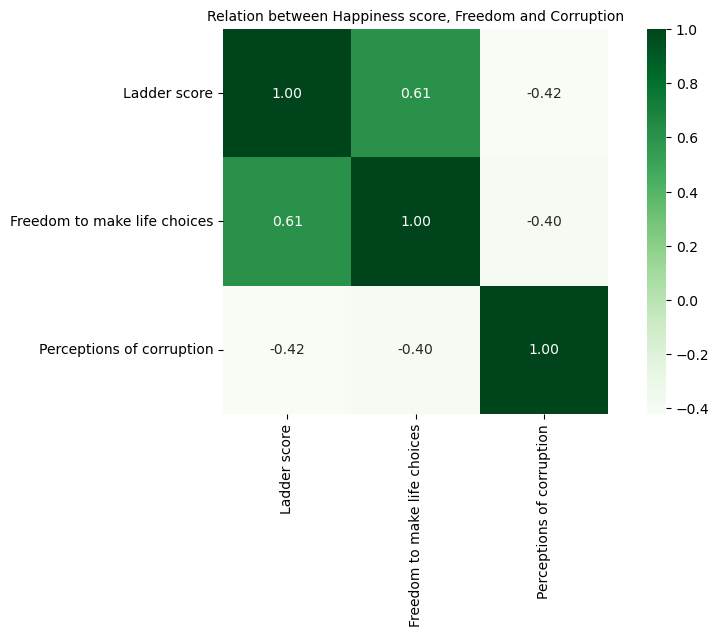

In [304]:
df1_matrix= df2021[['Ladder score', 'Freedom to make life choices', 'Perceptions of corruption']].corr()
df1_matrix
df1_matrix= df1_matrix.round(2)
df1_matrix.style.background_gradient(cmap="Greens")
plt.figure(figsize=(10,5))
plt.title('Relation between Happiness score, Freedom and Corruption', fontsize= "10")
sns.heatmap(df1_matrix, cmap= "Greens",
           annot= True, fmt= "0.2f", square= True)
plt.show()

Corruption erodes happiness. The negative correlation between Ladder score and Perception of corruption reflects this, suggesting that where corruption in societies is perceived as high, people report lower life satisfaction and vice-versa. A negative relation between freedom to make life choices, and perceptions of corruption shows that greater freedom to make life choices is linked to a reduced perception of corruption. People who report higher happiness tend to feel a greater sense of control over their lives- suggesting that personal agency and autonomy are important contributors to happiness. 


6. Some claim that population and population density impact happiness. Use an appropriate plot (such as a scatter plot) to analyse the relationship between happiness scores and both population size and density. Discuss your findings in fewer than 100 words

## Methodology:
The population DF and the DF2021 are merged. 
A scatter plot is generated to explore the relation between the variables. First between Ladder score and Population size, then relation between Ladder score and population density.
In the end, the relation between Happiness score, Population and Population density are all displayed in one chart. 

In [309]:
populationdf= pd.read_csv(r"D:\population_by_country_2020.csv")
populationdf= populationdf.rename(columns={"Country (or dependency)": "Country name"})
new_df= pd.merge(df2021,populationdf, on='Country name')
new_final_df= new_df[['Country name', 'Ladder score', 'Population (2020)', 'Density (P/Km²)']]
new_final_df

,Country name,Ladder score,Population (2020),Density (P/Km²)
0,Finland,7.842,5542237,18
1,Denmark,7.620,5795780,137
2,Switzerland,7.571,8665615,219
3,Iceland,7.554,341628,3
4,Netherlands,7.464,17141544,508
...,...,...,...,...
135,Lesotho,3.512,2145194,71
136,Botswana,3.467,2359585,4
137,Rwanda,3.415,13005303,525
138,Zimbabwe,3.145,14899771,38


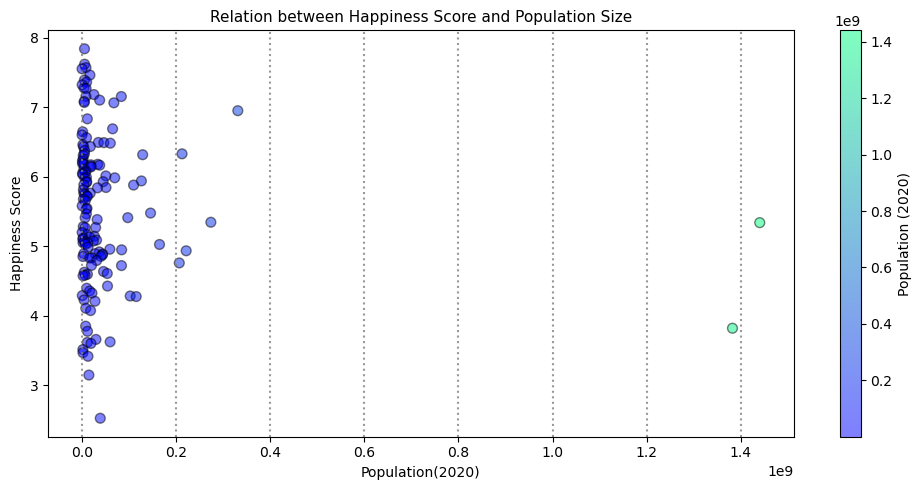

In [311]:
plt.figure(figsize=(10,5))
plt.scatter(new_final_df['Population (2020)'],
            new_final_df['Ladder score'],
            c= new_final_df['Population (2020)'],
            cmap='winter',
            edgecolor='black',
            alpha=0.5,
            s=50)

plt.xlabel('Population(2020)',fontsize=10)
plt.ylabel('Happiness Score',fontsize=10)
plt.gca().set_title('Relation between Happiness Score and Population Size', fontsize=11)
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.colorbar(label='Population (2020)')
plt.tight_layout()
plt.show()

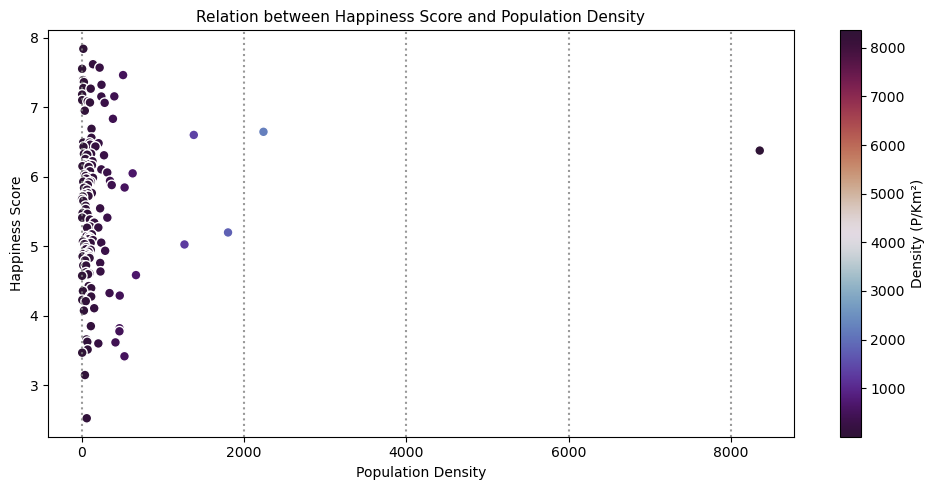

In [313]:
plt.figure(figsize=(10,5))
plt.scatter(new_final_df['Density (P/Km²)'],
            new_final_df['Ladder score'],
            c= new_final_df['Density (P/Km²)'],
            cmap='twilight_shifted',
            edgecolor='white',
            s=50)

plt.xlabel('Population Density',fontsize=10)
plt.ylabel('Happiness Score',fontsize=10)
plt.gca().set_title('Relation between Happiness Score and Population Density', fontsize=11)
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.colorbar(label='Density (P/Km²)')
plt.tight_layout()
plt.show()

Displaying relation between Happiness score and both, Population size and density in one plot:

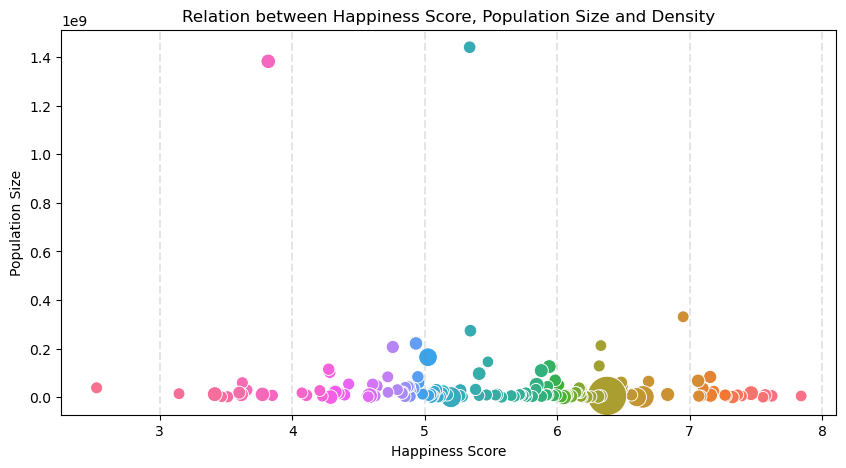

In [316]:
plt.rcParams['figure.figsize']=(10,5)
plt.title('Relation between Happiness Score, Population Size and Density')
sns.scatterplot(x= new_final_df['Ladder score'], y=new_final_df['Population (2020)'], hue=new_final_df['Country name'], size=new_final_df['Density (P/Km²)'], sizes= (70,800), legend= False)

plt.xlabel('Happiness Score')
plt.ylabel('Population Size')
plt.grid(color='grey', linestyle='--', linewidth= 1.5, axis='x', alpha= 0.2)
plt.show()

While population size or density per hectare may not be necessarily correlated with lower subjective well-being, the relation between population and ladder score in this dataset shows that the average levels of subjective well-being tend to decline as population size and density increase.  This shows that people from smaller, socially unified countries are happier. The average population size of the top 10 happiest countries is 67.5 million, while the average population size of the bottom unhappiest countries is 204 million. 


7. The relationship between happiness scores and urban density. Is it possible to
generate such insight using the provided data? Discuss your findings in fewer than 100 words.

## Methodology:
To ensure proper data handling, any occurrences of 'N.A' in the urban population density column are replaced with np.nan, marking them as missing values. 
Next, a regular expression (regex) is used to remove the percentage symbol from the data, ensuring only the numerical values remain. This is done using the replace method with a regex pattern to remove the % symbol from all entries. 
The cleaned data is converted into a numeric format using pd.to_numeric(). The errors='coerce' argument is used to convert and non-numeric values into NaN, so that only valid numeric values are retained.

In [321]:
import re

new_final_df1= new_df[['Country name', 'Ladder score', 'Urban Pop %']]
new_final_df1= new_final_df1.rename(columns={"Urban Pop %": "Urban Population Density"})
new_final_df1['Urban Population Density']= new_final_df1['Urban Population Density'].replace('N.A', np.nan)
new_final_df1['Urban Population Density']= new_final_df1['Urban Population Density'].replace('%','',regex=True)
new_final_df1['Urban Population Density']= pd.to_numeric(new_final_df1['Urban Population Density'], errors='coerce')
new_final_df1

,Country name,Ladder score,Urban Population Density
0,Finland,7.842,86.0
1,Denmark,7.620,88.0
2,Switzerland,7.571,74.0
3,Iceland,7.554,94.0
4,Netherlands,7.464,92.0
...,...,...,...
135,Lesotho,3.512,31.0
136,Botswana,3.467,73.0
137,Rwanda,3.415,18.0
138,Zimbabwe,3.145,38.0


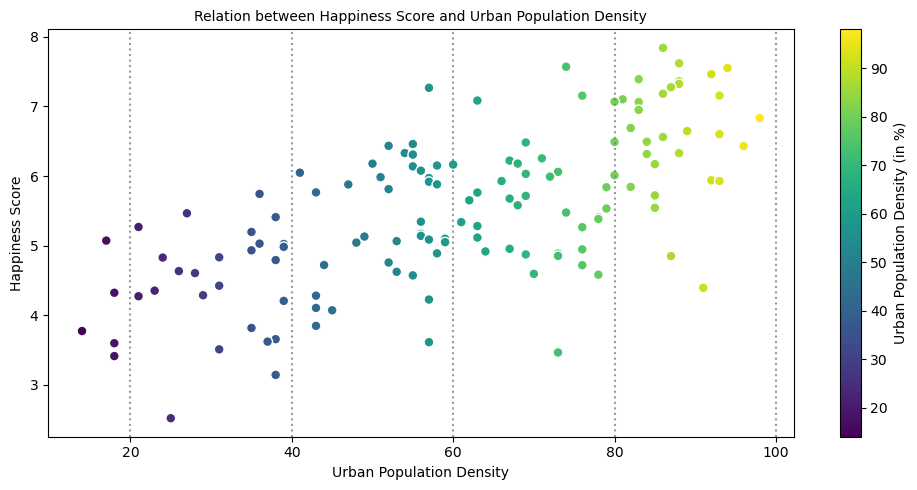

In [323]:
plt.figure(figsize=(10,5))
plt.scatter(new_final_df1['Urban Population Density'],
            new_final_df1['Ladder score'],
            c= new_final_df1['Urban Population Density'],
            cmap='viridis',
            edgecolor='white',
            s=50)

plt.xlabel('Urban Population Density',fontsize=10)
plt.ylabel('Happiness Score',fontsize=10)
plt.gca().set_title('Relation between Happiness Score and Urban Population Density', fontsize=10)
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.colorbar(label='Urban Population Density (in %)')
plt.tight_layout()
plt.show()

A popular belief is that living in densely populated urban areas negatively affects happiness. There are rising levels of urbanisation across the world. In 1950, 30 per cent of the global population resided in urban areas. By 2018, this rose to 55 per cent and is anticipated to reach 68 per cent by 2050, the World Happiness Report showed. However, data here shows that countries ranked lower in happiness scores, tend to have lower urban density. This means that the population is typically spread out across rural areas for the top unhappiest countries. 

8. It is often said that happier people tend to have more children. Use an appropriate plot to analyse the
relationship between happiness scores and birth rates. Discuss your findings in fewer than 100 words.


## Methodology 
A correlation matrix is created to explore the relationshops between 'Ladder score', 'Fertility Rate' using the 2021 dataset. The correlation values are rounded to two decimal places for clarity. A heatmap is then generated to represent correlations between these variables, with annotations showing the exact correlation values


In [328]:
new_final_df2= new_df[['Country name', 'Ladder score', 'Fert. Rate']]
new_final_df2

,Country name,Ladder score,Fert. Rate
0,Finland,7.842,1.5
1,Denmark,7.620,1.8
2,Switzerland,7.571,1.5
3,Iceland,7.554,1.8
4,Netherlands,7.464,1.7
...,...,...,...
135,Lesotho,3.512,3.2
136,Botswana,3.467,2.9
137,Rwanda,3.415,4.1
138,Zimbabwe,3.145,3.6


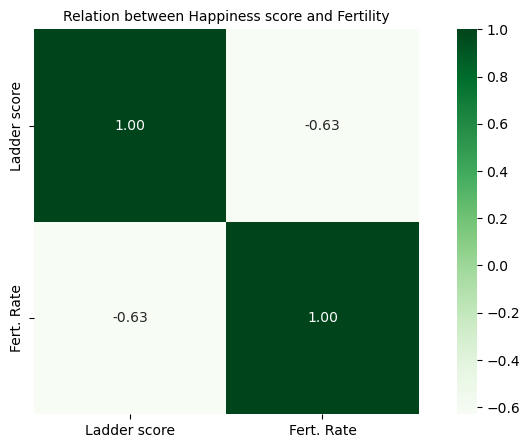

In [330]:
df2_matrix= new_final_df2[['Ladder score', 'Fert. Rate']].corr()
df2_matrix
df2_matrix= df2_matrix.round(2)
df2_matrix.style.background_gradient(cmap="coolwarm")
plt.figure(figsize=(10,5))
plt.title('Relation between Happiness score and Fertility', fontsize= "10")
sns.heatmap(df2_matrix, cmap= "Greens",
           annot= True, fmt= "0.2f", square= True)
plt.show()


Although it is believed that happier people tend to have more children, the data reflects otherwise. The happier countries tend to have lower fertility rate and vice-versa. Fertility rate refers to the average number of children to women who are of childbearing age, in a given population. All of the top 10 happiest countries have fertility rate below 2. 

9. Identify the top 10 formerly happy countries that are currently less happy than before, as well as the top
10 currently happy countries that have improved their happiness scores. Use the most appropriate method
(plot, table, or graph) to illustrate this data. Discuss your findings in fewer than 100 words.

## Methodology:
Data for 2023 is filtered to include only records for that year, and a similar process is performed for 2022. After merging for both DF, the difference in happiness scores between 2023 and 2022 by subtracting the 2022 score with 2023 score. A new column called 'Happiness Difference' is created which is then used to sort the countries based on the largest decrease in happiness scores.


In [335]:
df2023=pd.read_excel(r"D:\DataForTable2.1.xlsx")
df2023= df2023[df2023['year']==2023]
df2023= df2023.rename(columns={"Life Ladder": "Ladder score 2023"})
df2023_final= df2023[['Country name','Ladder score 2023']].reset_index()
df2023_final= df2023_final.drop(columns='index')
df2023_final

,Country name,Ladder score 2023
0,Afghanistan,1.445909
1,Albania,5.444691
2,Argentina,6.393229
3,Armenia,5.679090
4,Australia,7.024582
...,...,...
133,Venezuela,5.765363
134,Vietnam,6.325115
135,Yemen,3.531574
136,Zambia,3.685568


In [337]:
df2023=pd.read_excel(r"D:\DataForTable2.1.xlsx")
year_2022= df2023[df2023['year']==2022]
df2022= year_2022[['Country name', 'Life Ladder']]
df2022= df2022.rename(columns={"Life Ladder": "Ladder score 2022"}).reset_index()
df2022= df2022.drop(columns='index')
df2022

,Country name,Ladder score 2022
0,Afghanistan,1.281271
1,Albania,5.212213
2,Algeria,5.538172
3,Argentina,6.260993
4,Armenia,5.381943
...,...,...
135,Venezuela,5.948992
136,Vietnam,6.266509
137,Yemen,3.590379
138,Zambia,3.728098


In [338]:
df_last_and_current_year= pd.merge(df2022,df2023_final, on='Country name')
df_last_and_current_year['Happiness_Difference']= df_last_and_current_year['Ladder score 2023']-df_last_and_current_year['Ladder score 2022']
df_last_and_current_year= df_last_and_current_year.sort_values(['Happiness_Difference']).reset_index()
df_last_and_current_year= df_last_and_current_year.drop(columns='index')
df_last_and_current_year

,Country name,Ladder score 2022,Ladder score 2023,Happiness_Difference
0,Israel,7.662397,6.783402,-0.878995
1,Congo (Brazzaville),5.804919,4.953730,-0.851189
2,South Africa,5.581030,5.075719,-0.505311
3,Guinea,5.317493,4.827180,-0.490313
4,Lithuania,7.037577,6.552654,-0.484923
...,...,...,...,...
130,Kosovo,6.159853,6.877793,0.717939
131,India,3.929816,4.676009,0.746192
132,Sierra Leone,2.560430,3.466578,0.906148
133,Mozambique,4.739677,5.704499,0.964822


In [341]:
countries_less_happy_than_before= df_last_and_current_year.head(10).reset_index()
countries_less_happy_than_before=countries_less_happy_than_before.drop(columns='index')
countries_less_happy_than_before

,Country name,Ladder score 2022,Ladder score 2023,Happiness_Difference
0,Israel,7.662397,6.783402,-0.878995
1,Congo (Brazzaville),5.804919,4.953730,-0.851189
2,South Africa,5.581030,5.075719,-0.505311
3,Guinea,5.317493,4.827180,-0.490313
4,Lithuania,7.037577,6.552654,-0.484923
5,Mauritania,4.723869,4.292048,-0.431821
6,Nigeria,5.294247,4.868937,-0.425310
7,Sri Lanka,3.984860,3.602455,-0.382405
8,Pakistan,4.930678,4.549314,-0.381364
9,Austria,6.998997,6.635664,-0.363333


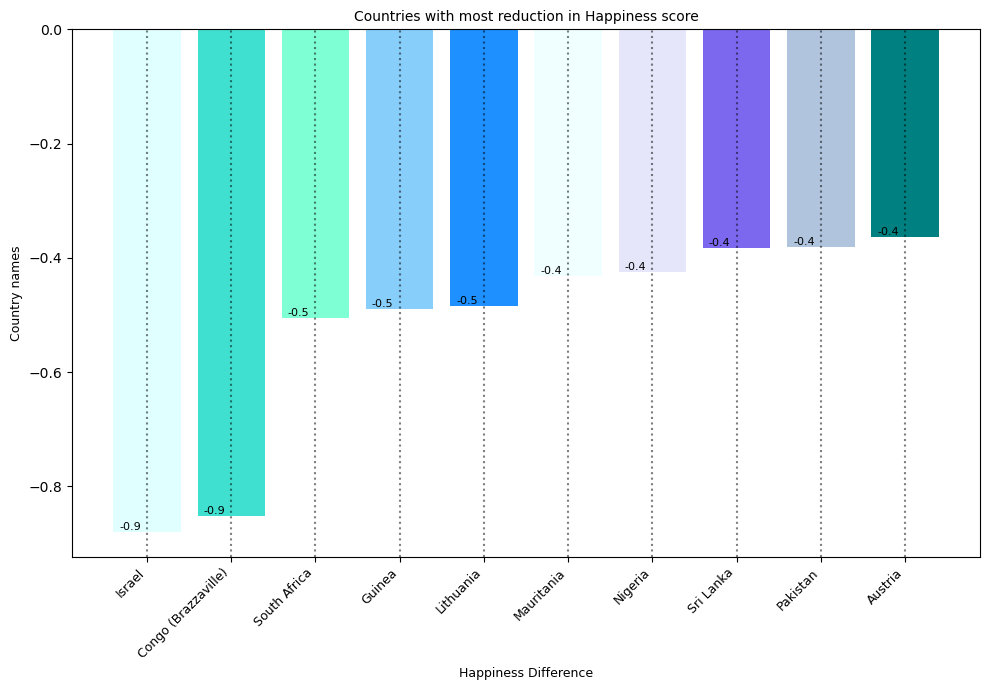

In [343]:
plt.figure(figsize=(10,7))
colors= ['lightcyan']+['turquoise']+['aquamarine']+['lightskyblue']+['dodgerblue']+['azure']+['lavender']+['mediumslateblue']+['lightsteelblue']+['teal']

bars= plt.bar(countries_less_happy_than_before['Country name'],
         countries_less_happy_than_before['Happiness_Difference'],
         color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_x()+bar.get_width()/4,
             bar.get_height(),
             f'{countries_less_happy_than_before["Happiness_Difference"].iloc[i]:.1f}',
             ha='center',
             va='bottom',
             fontsize=8,
             color='black')
    
plt.xlabel('Happiness Difference',fontsize=9)
plt.ylabel('Country names',fontsize=9)
plt.gca().set_title('Countries with most reduction in Happiness score', fontsize=10)
plt.grid(color='black', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.5)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

In [345]:
countries_happier_than_before= df_last_and_current_year.tail(10).reset_index()
countries_happier_than_before=countries_happier_than_before.drop(columns='index')
countries_happier_than_before

,Country name,Ladder score 2022,Ladder score 2023,Happiness_Difference
0,Iraq,4.927996,5.475372,0.547376
1,Panama,5.979382,6.543290,0.563908
2,Saudi Arabia,6.381610,6.953374,0.571764
3,Azerbaijan,4.576282,5.213895,0.637613
4,Bangladesh,3.407532,4.113549,0.706017
5,Kosovo,6.159853,6.877793,0.717939
6,India,3.929816,4.676009,0.746192
7,Sierra Leone,2.560430,3.466578,0.906148
8,Mozambique,4.739677,5.704499,0.964822
9,Lebanon,2.352428,3.587908,1.235481


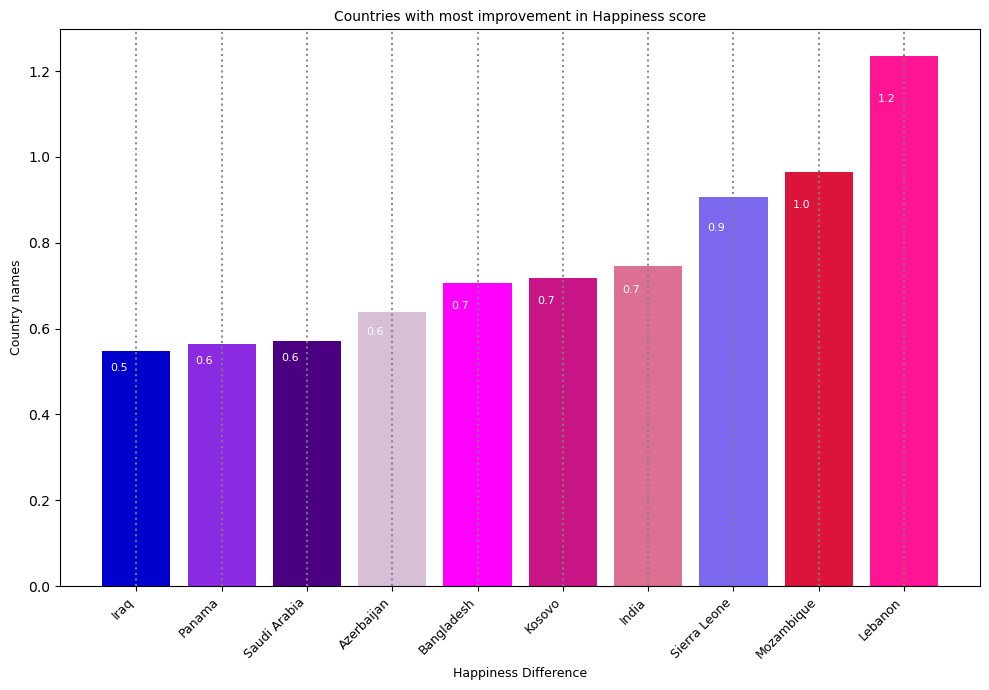

In [347]:
plt.figure(figsize=(10,7))
colors= ['mediumblue']+['blueviolet']+['indigo']+['thistle']+['fuchsia']+['mediumvioletred']+['palevioletred']+['mediumslateblue']+['crimson']+['deeppink']

bars= plt.bar(countries_happier_than_before['Country name'],
         countries_happier_than_before['Happiness_Difference'],
         color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_x()+bar.get_width()/4,
             bar.get_height()/1.1,
             f'{countries_happier_than_before["Happiness_Difference"].iloc[i]:.1f}',
             ha='center',
             va='bottom',
             fontsize=8,
             color='white')
    
plt.xlabel('Happiness Difference',fontsize=9)
plt.ylabel('Country names',fontsize=9)
plt.gca().set_title('Countries with most improvement in Happiness score', fontsize=10)
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.9)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

A comparison of the Ladder scores from 2022 and 2023 reveals that Israel experienced the largest decline in happiness, with a drop of 0.88 points in 2023 compared to the previous year. This was closely followed by Congo, which saw a reduction of 0.85 points. Other countries with notable declines include South Africa, Guinea, Lithuania, and Mauritania. On the other hand, Lebanon saw the greatest improvement, with a 1.23-point increase in its Ladder score in the same period of time.


10. Some suggest that COVID-19 has impacted happiness levels. Investigate this claim by comparing
happiness scores before and after the pandemic using the World Happiness Report 2024 data. Identify
which countries were most affected and which were least affected. Use an appropriate method (such as a
bar chart or line graph) to demonstrate these findings. Discuss your conclusions in fewer than 100 words

## Methodology:
To investigate this claim, data between 2019 and 2020 was compared. Another column for 2023 was created, to compare the happiness score for 2023, with other years as well. 'Happiness Difference between 2019 and 2020' was created by subtracting 2019 from 2020. Similar procedure was done for 2019 and 2023. After this, happiness score was sorted, to find countries most and least affected, in these periods.

In [351]:
df2019=pd.read_excel(r"D:\DataForTable2.1.xlsx")
df2019= df2019[df2019['year']==2019]
df2019= df2019.rename(columns={"Life Ladder": "Ladder score 2019"})
df2019=df2019[['Country name','Ladder score 2019']]
df2020=pd.read_excel(r"D:\DataForTable2.1.xlsx")
df2020= df2020[df2020['year']==2020]
df2020= df2020.rename(columns={"Life Ladder": "Ladder score 2020"})
df2020=df2020[['Country name','Ladder score 2020']]
df_merge_2019_2020= pd.merge(df2020,df2019,  on='Country name')
df_mergefor_2019_2020_2023= pd.merge(df_merge_2019_2020, df2023_final,  on='Country name')
df_mergefor_2019_2020_2023

,Country name,Ladder score 2020,Ladder score 2019,Ladder score 2023
0,Albania,5.364910,4.995318,5.444691
1,Argentina,5.900567,6.085561,6.393229
2,Australia,7.137368,7.233995,7.024582
3,Austria,7.213489,7.195361,6.635664
4,Bahrain,6.173176,7.098012,5.959068
...,...,...,...,...
106,Uzbekistan,5.841930,6.154049,6.385361
107,Venezuela,4.573830,5.080803,5.765363
108,Vietnam,5.462342,5.467451,6.325115
109,Zambia,4.837992,3.306797,3.685568


In [358]:
df_mergefor_2019_2020_2023['Happiness Difference between 2019 and 2020']= df_mergefor_2019_2020_2023['Ladder score 2020']-df_mergefor_2019_2020_2023['Ladder score 2019']
df_mergefor_2019_2020_2023['Happiness Difference between 2020 and 2023']= df_mergefor_2019_2020_2023['Ladder score 2023']-df_mergefor_2019_2020_2023['Ladder score 2020']
df_mergefor_2019_2020_2023['Happiness Difference between 2019 and 2023']= df_mergefor_2019_2020_2023['Ladder score 2023']-df_mergefor_2019_2020_2023['Ladder score 2019']
df_mergefor_2019_2020_2023= df_mergefor_2019_2020_2023.sort_values('Happiness Difference between 2019 and 2023', ascending= False).reset_index()
df_mergefor_2019_2020_2023= df_mergefor_2019_2020_2023.drop(columns=['level_0','index'])
df_mergefor_2019_2020_2023

,Country name,Ladder score 2020,Ladder score 2019,Ladder score 2023,Happiness Difference between 2019 and 2020,Happiness Difference between 2020 and 2023,Happiness Difference between 2019 and 2023
0,India,4.223866,3.248770,4.676009,0.975096,0.452143,1.427239
1,China,5.771065,5.144120,6.144764,0.626945,0.373699,1.000644
2,Zimbabwe,3.159802,2.693523,3.572386,0.466279,0.412584,0.878863
3,Vietnam,5.462342,5.467451,6.325115,-0.005109,0.862773,0.857664
4,Venezuela,4.573830,5.080803,5.765363,-0.506974,1.191534,0.684560
...,...,...,...,...,...,...,...
106,Ghana,5.319483,4.966810,4.298451,0.352674,-1.021032,-0.668358
107,Switzerland,7.508435,7.694221,6.968833,-0.185786,-0.539602,-0.725388
108,Cambodia,4.376985,4.998285,4.221345,-0.621300,-0.155640,-0.776939
109,Bangladesh,5.279987,5.114217,4.113549,0.165770,-1.166438,-1.000668


In [360]:
countries_least_affected_by_covid_in_2020= df_mergefor_2019_2020_2023[['Country name','Happiness Difference between 2019 and 2020','Happiness Difference between 2019 and 2023']]
countries_least_affected_by_covid_in_2020= df_mergefor_2019_2020_2023.sort_values('Happiness Difference between 2019 and 2020', ascending=False).head(10)
countries_least_affected_by_covid_in_2020= countries_least_affected_by_covid_in_2020.drop(['Ladder score 2020','Ladder score 2019','Ladder score 2023'], axis=1)
countries_least_affected_by_covid_in_2020

,Country name,Happiness Difference between 2019 and 2020,Happiness Difference between 2020 and 2023,Happiness Difference between 2019 and 2023
24,Zambia,1.531196,-1.152424,0.378772
6,Nigeria,1.236464,-0.634011,0.602453
0,India,0.975096,0.452143,1.427239
27,Croatia,0.882248,-0.549613,0.332635
25,Romania,0.655200,-0.296553,0.358647
1,China,0.626945,0.373699,1.000644
16,Malaysia,0.586245,-0.146097,0.440148
63,Ukraine,0.567914,-0.597231,-0.029317
104,Sri Lanka,0.565190,-1.176034,-0.610844
35,Kyrgyzstan,0.564365,-0.340077,0.224288


In [362]:
countries_least_affected_by_covid= df_mergefor_2019_2020_2023[['Country name','Happiness Difference between 2019 and 2020','Happiness Difference between 2019 and 2023']]
countries_least_affected_by_covid= df_mergefor_2019_2020_2023.sort_values('Happiness Difference between 2019 and 2023', ascending=False).head(10)
countries_least_affected_by_covid= countries_least_affected_by_covid.drop(['Ladder score 2020','Ladder score 2019','Ladder score 2023'], axis=1)
countries_least_affected_by_covid

,Country name,Happiness Difference between 2019 and 2020,Happiness Difference between 2020 and 2023,Happiness Difference between 2019 and 2023
0,India,0.975096,0.452143,1.427239
1,China,0.626945,0.373699,1.000644
2,Zimbabwe,0.466279,0.412584,0.878863
3,Vietnam,-0.005109,0.862773,0.857664
4,Venezuela,-0.506974,1.191534,0.684560
5,Namibia,0.015199,0.604311,0.619511
6,Nigeria,1.236464,-0.634011,0.602453
7,Türkiye,-0.010520,0.601146,0.590627
8,Mexico,-0.467724,1.041511,0.573786
9,Paraguay,-0.151377,0.712540,0.561163


<Figure size 500x500 with 0 Axes>

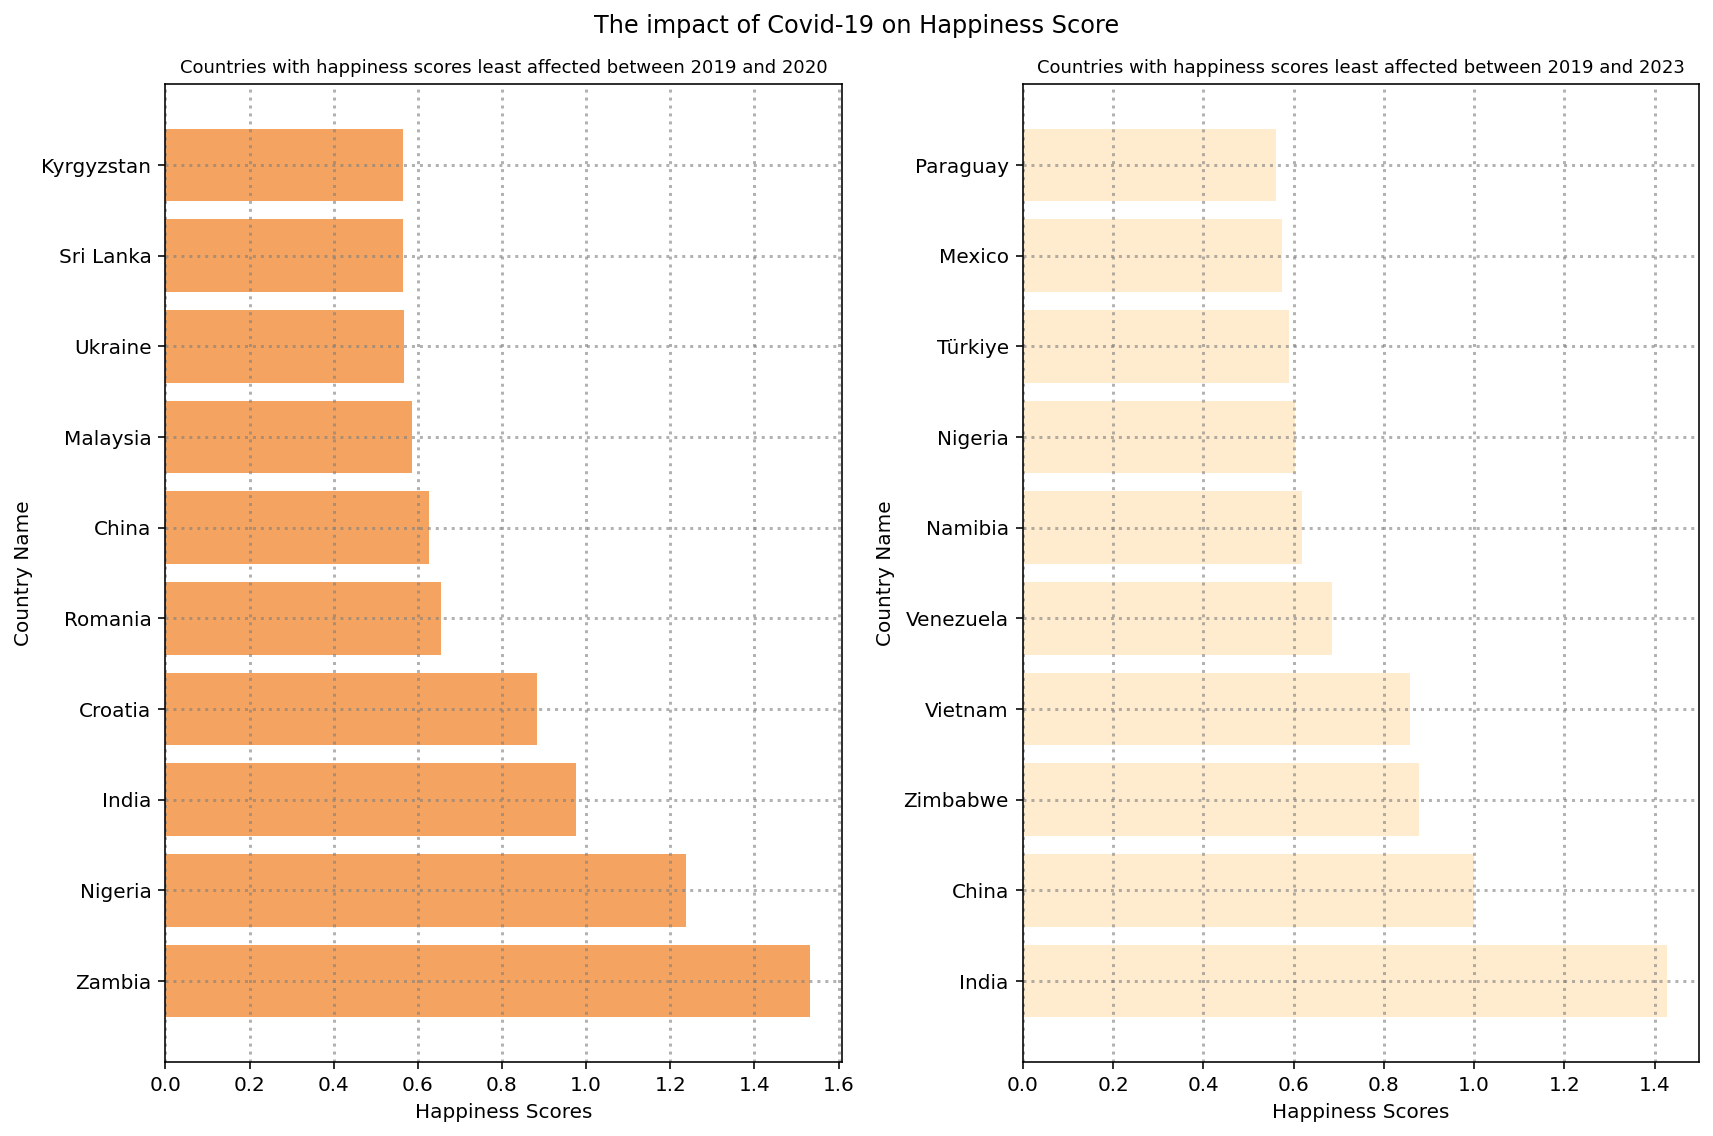

In [364]:
plt.figure(figsize=(5,5))
fig, axes= plt.subplots (1,2, figsize =(12,8), dpi=144)
plt.suptitle("The impact of Covid-19 on Happiness Score", fontsize=12)


axes[0].barh(countries_least_affected_by_covid_in_2020['Country name'],
         countries_least_affected_by_covid_in_2020['Happiness Difference between 2019 and 2020'], color='sandybrown')

axes[0].set_title('Countries with happiness scores least affected between 2019 and 2020', fontsize=9)
axes[0].set_xlabel('Happiness Scores')
axes[0].set_ylabel('Country Name')
axes[0].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)

axes[1].barh(countries_least_affected_by_covid['Country name'],
         countries_least_affected_by_covid['Happiness Difference between 2019 and 2023'], color='blanchedalmond')

axes[1].set_title('Countries with happiness scores least affected between 2019 and 2023', fontsize=9)
axes[1].set_xlabel('Happiness Scores')
axes[1].set_ylabel('Country Name')
axes[1].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)
    
plt.tight_layout()
plt.show()

In [366]:
countries_most_affected_by_covid_in_2020= df_mergefor_2019_2020_2023[['Country name','Happiness Difference between 2019 and 2020','Happiness Difference between 2019 and 2023']]
countries_most_affected_by_covid_in_2020= df_mergefor_2019_2020_2023.sort_values('Happiness Difference between 2019 and 2020', ascending=True).head(10)
countries_most_affected_by_covid_in_2020= countries_most_affected_by_covid_in_2020.drop(['Ladder score 2020','Ladder score 2019','Ladder score 2023'], axis=1)
countries_most_affected_by_covid_in_2020

,Country name,Happiness Difference between 2019 and 2020,Happiness Difference between 2020 and 2023,Happiness Difference between 2019 and 2023
92,Lebanon,-1.390467,0.954156,-0.436311
72,Philippines,-1.188160,1.103927,-0.084233
68,Peru,-1.005002,0.941287,-0.063715
52,El Salvador,-0.992894,1.019920,0.027026
110,Bahrain,-0.924837,-0.214108,-1.138944
71,Dominican Republic,-0.835827,0.752852,-0.082975
90,Senegal,-0.731963,0.335952,-0.396011
105,Mali,-0.718518,0.100502,-0.618016
23,Costa Rica,-0.659146,1.045597,0.386450
95,Colombia,-0.641123,0.195229,-0.445894


In [368]:
countries_most_affected_by_covid= df_mergefor_2019_2020_2023[['Country name','Happiness Difference between 2019 and 2020','Happiness Difference between 2019 and 2023']]
countries_most_affected_by_covid= df_mergefor_2019_2020_2023.sort_values('Happiness Difference between 2019 and 2023', ascending=True).head(10)
countries_most_affected_by_covid= countries_most_affected_by_covid.drop(['Ladder score 2020','Ladder score 2019','Ladder score 2023'], axis=1)
countries_most_affected_by_covid

,Country name,Happiness Difference between 2019 and 2020,Happiness Difference between 2020 and 2023,Happiness Difference between 2019 and 2023
110,Bahrain,-0.924837,-0.214108,-1.138944
109,Bangladesh,0.165770,-1.166438,-1.000668
108,Cambodia,-0.621300,-0.155640,-0.776939
107,Switzerland,-0.185786,-0.539602,-0.725388
106,Ghana,0.352674,-1.021032,-0.668358
105,Mali,-0.718518,0.100502,-0.618016
104,Sri Lanka,0.565190,-1.176034,-0.610844
103,Morocco,-0.254134,-0.316103,-0.570238
102,Austria,0.018128,-0.577825,-0.559697
101,Benin,-0.568615,0.012088,-0.556527


<Figure size 500x500 with 0 Axes>

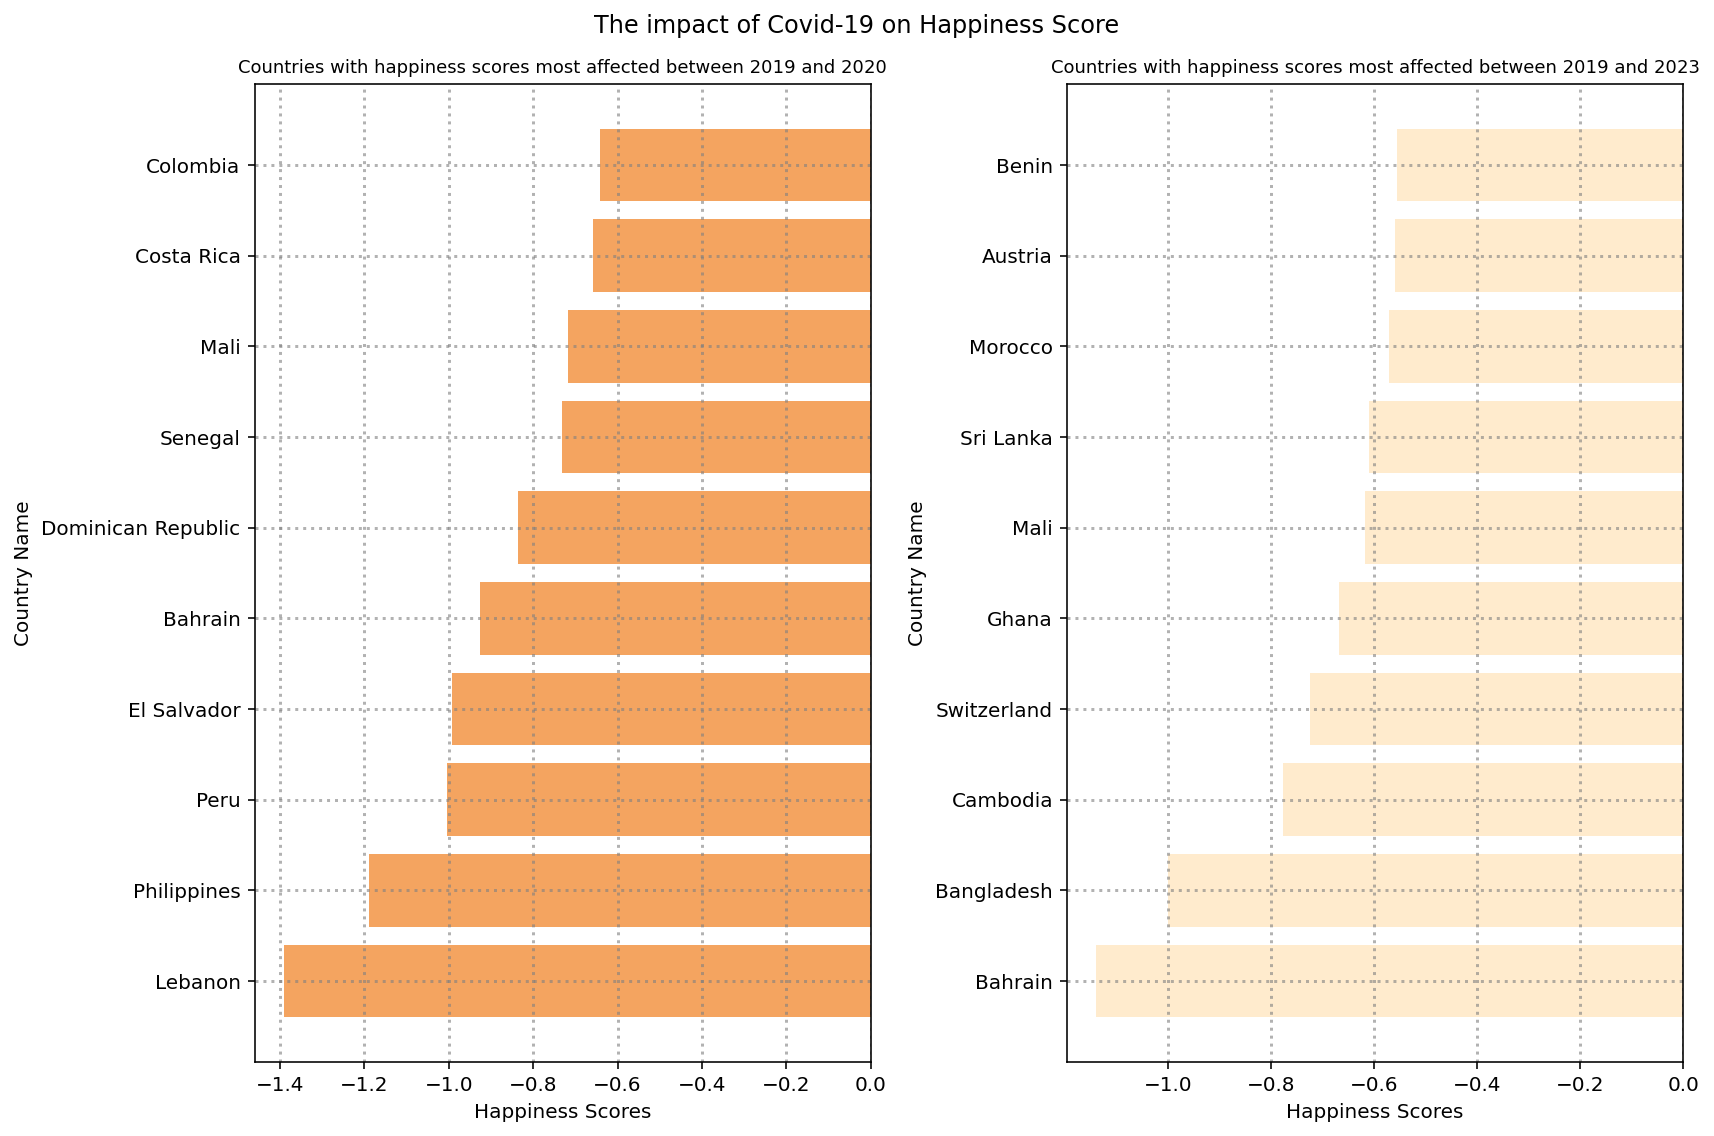

In [370]:
plt.figure(figsize=(5,5))
fig, axes= plt.subplots (1,2, figsize =(12,8), dpi=144)
plt.suptitle("The impact of Covid-19 on Happiness Score", fontsize=12)


axes[0].barh(countries_most_affected_by_covid_in_2020['Country name'],
         countries_most_affected_by_covid_in_2020['Happiness Difference between 2019 and 2020'], color='sandybrown')

axes[0].set_title('Countries with happiness scores most affected between 2019 and 2020', fontsize=9)
axes[0].set_xlabel('Happiness Scores')
axes[0].set_ylabel('Country Name')
axes[0].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)

axes[1].barh(countries_most_affected_by_covid['Country name'],
         countries_most_affected_by_covid['Happiness Difference between 2019 and 2023'], color='blanchedalmond')

axes[1].set_title('Countries with happiness scores most affected between 2019 and 2023', fontsize=9)
axes[1].set_xlabel('Happiness Scores')
axes[1].set_ylabel('Country Name')
axes[1].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)
    
plt.tight_layout()
plt.show()

Covid-19 has resulted in millions of deaths worldwide. The World Happiness Report in 2021, highlighted that there was a surge of 4 per cent in annual deaths across the world, which has caused increased anxiety and mental disruption. The United Nations Statistics Division (UNSD) reported that the global unemployment rate touched 6.5 per cent by 2020.

A comparison between 2019 and 2020, shows the immediate impact the onset of Covid-19 had on the ladder score. Based on this, Lebanon, Philippines, Peru, El Salvador and Bahrain were the most affected. A comparison between 2019 and 2023, showed a lasting impact on happiness, and based on that, countries are struggling to recover. Bahrain experienced the greatest decline, followed by Bangladesh. The least affect in the happiness score country between 2019 and 2020 was seen in Zambia, followed by Nigeria, India and Croatia. For the longer period recovery, India showed the most recovery followed by China and Zimbabwe. 


11. Examine whether the 2008 global financial crisis affected the happiness index. Analyse happiness
scores before and after the crisis to identify any significant changes. Use an appropriate method (such as
a line graph or bar chart) to illustrate your findings. Regions or countries most
impacted in the happiness index by the 2008 crisis. Discuss your conclusions in fewer than 100 words

## Methodology:
To understand the impact of finacial crisis, the procedure to gauge the impact of covid-19 was implemented. The reason why only the data for countries was taken, and not for 'regional indicators', because there is no historical data available for region-wise indicators in the 'world happiness score-historical' dataset. 

In [374]:
df2007= dfhistorical[dfhistorical['year']==2007]
df2007= df2007.rename(columns={"Life Ladder": "Ladder score 2007"})
df2008= dfhistorical[dfhistorical['year']==2008]
df2008= df2008.rename(columns={"Life Ladder": "Ladder score 2008"})
df2014= dfhistorical[dfhistorical['year']==2014]
df2014= df2014.rename(columns={"Life Ladder": "Ladder score 2014"})
df_2007_2008= pd.merge(df2007,df2008,  on='Country name')
df_2007_2008_2014= pd.merge(df_2007_2008, df2014,  on='Country name')
df_2007_2008_2014= df_2007_2008_2014[['Country name', 'Ladder score 2007', 'Ladder score 2008', 'Ladder score 2014']]
df_2007_2008_2014['Happiness Difference between 2007 and 2008']= df_2007_2008_2014['Ladder score 2008']-df_2007_2008_2014['Ladder score 2007']
df_2007_2008_2014['Happiness Difference between 2008 and 2014']= df_2007_2008_2014['Ladder score 2014']-df_2007_2008_2014['Ladder score 2008']
df_2007_2008_2014

,Country name,Ladder score 2007,Ladder score 2008,Ladder score 2014,Happiness Difference between 2007 and 2008,Happiness Difference between 2008 and 2014
0,Argentina,6.073,5.961,6.671,-0.112,0.710
1,Armenia,4.882,4.652,4.453,-0.230,-0.199
2,Australia,7.285,7.254,7.289,-0.031,0.035
3,Azerbaijan,4.568,4.817,5.252,0.249,0.435
4,Bangladesh,4.607,5.052,4.636,0.445,-0.416
...,...,...,...,...,...,...
76,United States,7.513,7.280,7.151,-0.233,-0.129
77,Uruguay,5.694,5.664,6.561,-0.030,0.897
78,Vietnam,5.422,5.480,5.085,0.058,-0.395
79,Zambia,3.998,4.730,4.346,0.732,-0.384


countries most impacted between 2007 and 2008

In [377]:
countries_most_impacted_between_2007_and_2008= df_2007_2008_2014.sort_values('Happiness Difference between 2007 and 2008', ascending= True)
countries_most_impacted_between_2007_and_2008= countries_most_impacted_between_2007_and_2008.drop(['Ladder score 2007','Ladder score 2008','Ladder score 2014'], axis=1).head(10)
countries_most_impacted_between_2007_and_2008

,Country name,Happiness Difference between 2007 and 2008,Happiness Difference between 2008 and 2014
53,Pakistan,-1.257,1.022
21,Egypt,-0.909,0.253
35,Jordan,-0.668,0.403
62,Sierra Leone,-0.588,1.503
17,Costa Rica,-0.581,0.396
37,Kenya,-0.561,0.890
72,Turkey,-0.505,0.462
58,Philippines,-0.485,0.724
60,Saudi Arabia,-0.456,-0.533
43,Malaysia,-0.432,0.156


In [379]:
countries_most_impacted_between_2008_and_2014= df_2007_2008_2014.sort_values('Happiness Difference between 2008 and 2014', ascending= True)
countries_most_impacted_between_2008_and_2014= countries_most_impacted_between_2008_and_2014.drop(['Ladder score 2007','Ladder score 2008','Ladder score 2014'], axis=1).head(10)
countries_most_impacted_between_2008_and_2014

,Country name,Happiness Difference between 2007 and 2008,Happiness Difference between 2008 and 2014
13,Chad,0.491,-1.172
26,Ghana,-0.255,-1.105
70,Tanzania,0.067,-0.902
74,Ukraine,-0.080,-0.875
66,Spain,0.299,-0.838
73,Uganda,0.113,-0.799
33,Italy,0.206,-0.753
29,India,0.119,-0.722
10,Cambodia,0.306,-0.579
60,Saudi Arabia,-0.456,-0.533


<Figure size 500x500 with 0 Axes>

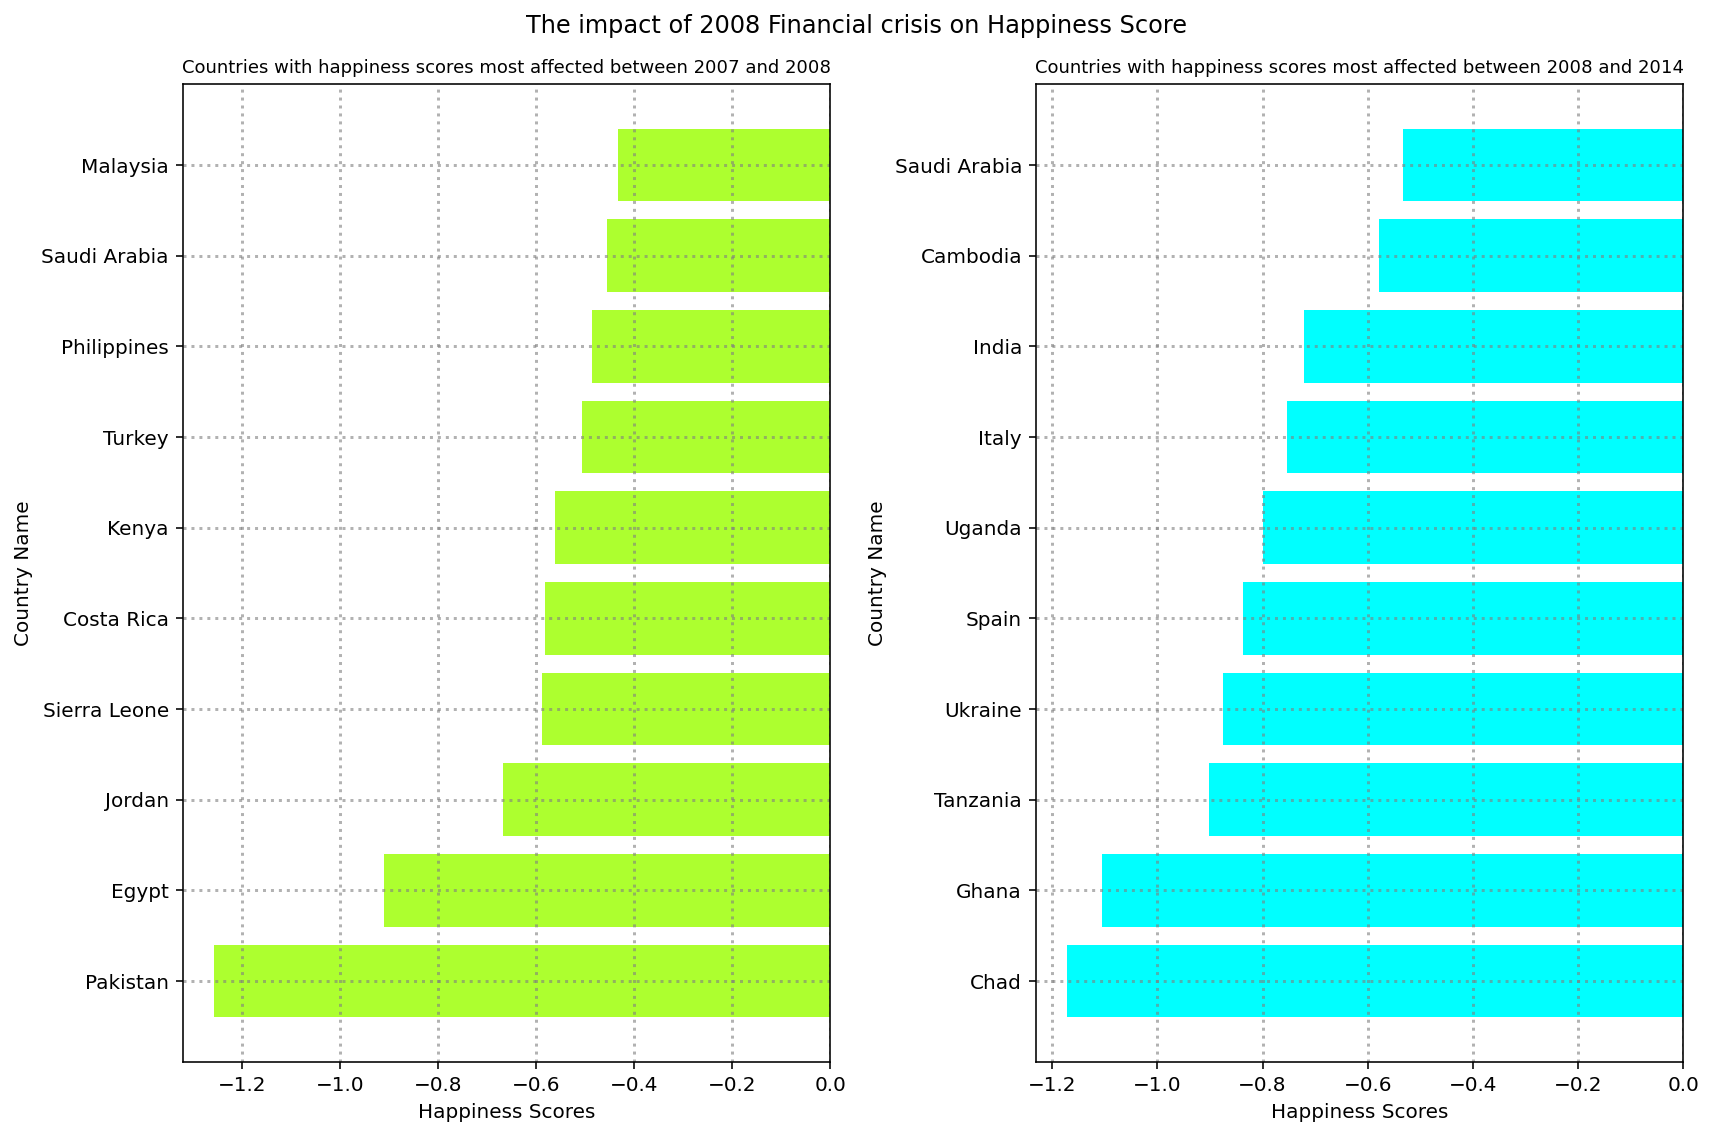

In [381]:
plt.figure(figsize=(5,5))
fig, axes= plt.subplots (1,2, figsize =(12,8), dpi=144)
plt.suptitle("The impact of 2008 Financial crisis on Happiness Score", fontsize=12)


axes[0].barh(countries_most_impacted_between_2007_and_2008['Country name'],
         countries_most_impacted_between_2007_and_2008['Happiness Difference between 2007 and 2008'], color='greenyellow')

axes[0].set_title('Countries with happiness scores most affected between 2007 and 2008', fontsize=9)
axes[0].set_xlabel('Happiness Scores')
axes[0].set_ylabel('Country Name')
axes[0].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)

axes[1].barh(countries_most_impacted_between_2008_and_2014['Country name'],
         countries_most_impacted_between_2008_and_2014['Happiness Difference between 2008 and 2014'], color='cyan')

axes[1].set_title('Countries with happiness scores most affected between 2008 and 2014', fontsize=9)
axes[1].set_xlabel('Happiness Scores')
axes[1].set_ylabel('Country Name')
axes[1].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)
    
plt.tight_layout()
plt.show()

country which recovered the most after 2008 in 2014

In [384]:
countries_least_impacted_between_2007_and_2008 = df_2007_2008_2014.sort_values('Happiness Difference between 2007 and 2008', ascending= False)
countries_least_impacted_between_2007_and_2008= countries_least_impacted_between_2007_and_2008.drop(['Ladder score 2007','Ladder score 2008','Ladder score 2014'], axis=1).head(10)
countries_least_impacted_between_2007_and_2008

,Country name,Happiness Difference between 2007 and 2008,Happiness Difference between 2008 and 2014
79,Zambia,0.732,-0.384
46,Moldova,0.728,0.414
69,Tajikistan,0.632,-0.168
41,Liberia,0.520,0.350
13,Chad,0.491,-1.172
40,Latvia,0.478,0.584
24,Georgia,0.449,0.132
4,Bangladesh,0.445,-0.416
32,Israel,0.420,0.140
38,Kosovo,0.418,-0.522


In [386]:
countries_least_impacted_between_2008_and_2014= df_2007_2008_2014.sort_values('Happiness Difference between 2008 and 2014', ascending= False)
countries_least_impacted_between_2008_and_2014= countries_least_impacted_between_2008_and_2014.drop(['Ladder score 2007','Ladder score 2008','Ladder score 2014'], axis=1).head(10)
countries_least_impacted_between_2008_and_2014

,Country name,Happiness Difference between 2007 and 2008,Happiness Difference between 2008 and 2014
62,Sierra Leone,-0.588,1.503
71,Thailand,-0.148,1.349
51,Nicaragua,0.160,1.171
14,Chile,0.091,1.055
53,Pakistan,-1.257,1.022
80,Zimbabwe,-0.106,1.010
77,Uruguay,-0.030,0.897
37,Kenya,-0.561,0.890
30,Indonesia,-0.286,0.782
57,Peru,-0.085,0.737


<Figure size 500x500 with 0 Axes>

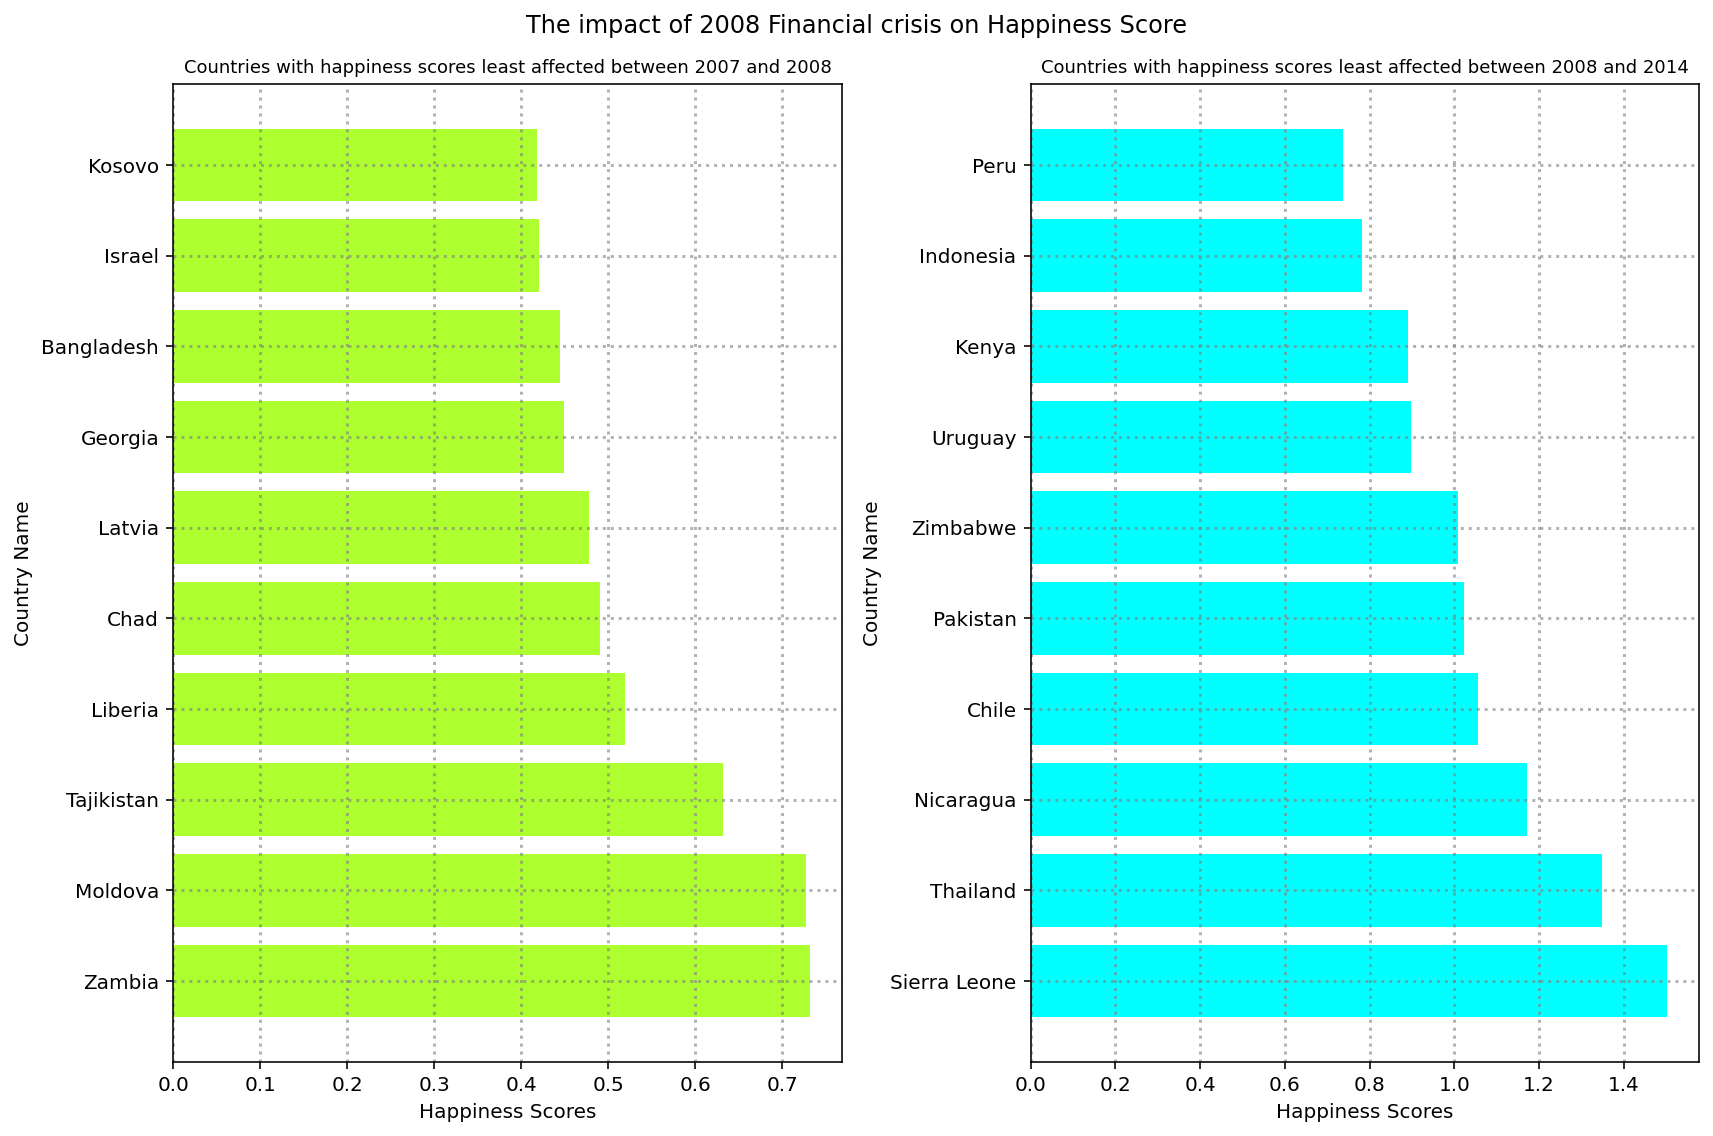

In [388]:
plt.figure(figsize=(5,5))
fig, axes= plt.subplots (1,2, figsize =(12,8), dpi=144)
plt.suptitle("The impact of 2008 Financial crisis on Happiness Score", fontsize=12)


axes[0].barh(countries_least_impacted_between_2007_and_2008['Country name'],
         countries_least_impacted_between_2007_and_2008['Happiness Difference between 2007 and 2008'], color='greenyellow')

axes[0].set_title('Countries with happiness scores least affected between 2007 and 2008', fontsize=9)
axes[0].set_xlabel('Happiness Scores')
axes[0].set_ylabel('Country Name')
axes[0].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)

axes[1].barh(countries_least_impacted_between_2008_and_2014['Country name'],
         countries_least_impacted_between_2008_and_2014['Happiness Difference between 2008 and 2014'], color='cyan')

axes[1].set_title('Countries with happiness scores least affected between 2008 and 2014', fontsize=9)
axes[1].set_xlabel('Happiness Scores')
axes[1].set_ylabel('Country Name')
axes[1].grid(color='grey', linestyle=':', linewidth=1.5, alpha=0.6)
    
plt.tight_layout()
plt.show()

The 2008 financial crisis officially ended in June 2009, but the effects of the recession persisted well beyond that. It was not until 2014 that the unemployment rate finally returned to pre-crisis levels. This is the reason, the comparison between the happiness index of 2007 and 2008 and the happiness index between 2008 and 2014 were taken into consideration. The immediate impact was seen in Pakistan, followed by Egypt, Jordan and Sierra Leone, as the happiness scores of these countries plunged the most from 2007 to 2008. The least impact on the happiness scores was seen in Zambia, Moldova and Tajikistan during this period. 

12. Investigate whether air quality and pollution levels correlate with the happiness index. Use an
appropriate method, such as a scatter plot, to visualize the relationship between happiness scores and air
quality metrics. Discuss your findings in fewer than 100 words

## Methodology:
After loading the 'air pollution' file, the file is merged with the DF2021 file, to understand the relation between aqi_value, and the ladder socre.

In [392]:
air_pollution= pd.read_csv(r"D:\global_air_pollution_data.csv")
air_pollution= air_pollution.rename(columns={"country_name": "Country name"})
df_for_pollution_and_happiness= pd.merge(air_pollution, df2021, on='Country name')
df_for_pollution_and_happiness_final= df_for_pollution_and_happiness.groupby('Country name')[['aqi_value','Ladder score']].mean()
df_for_pollution_and_happiness1= df_for_pollution_and_happiness_final.reset_index()
df_for_pollution_and_happiness1

,Country name,aqi_value,Ladder score
0,Afghanistan,95.959184,2.523
1,Albania,68.250000,5.117
2,Algeria,88.166667,4.887
3,Argentina,28.449275,5.929
4,Armenia,53.636364,5.283
...,...,...,...
123,Uruguay,26.653846,6.431
124,Uzbekistan,119.086207,6.179
125,Yemen,144.571429,3.658
126,Zambia,40.666667,4.073


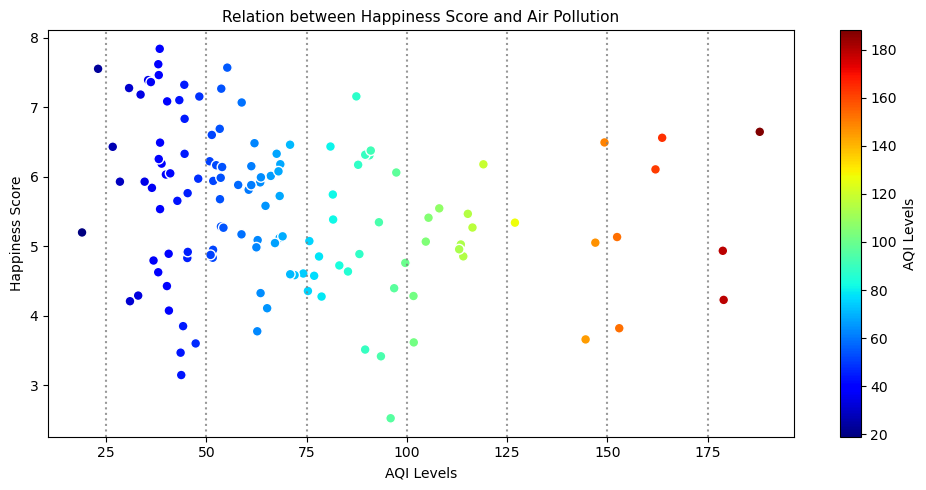

In [394]:
plt.figure(figsize=(10,5))
plt.scatter(df_for_pollution_and_happiness1['aqi_value'],
            df_for_pollution_and_happiness1['Ladder score'],
            c= df_for_pollution_and_happiness1['aqi_value'],
            cmap='jet',
            edgecolor='white',
            s=50)

plt.xlabel('AQI Levels',fontsize=10)
plt.ylabel('Happiness Score',fontsize=10)
plt.gca().set_title('Relation between Happiness Score and Air Pollution', fontsize=11)
plt.grid(color='grey', linestyle=':', linewidth= 1.5, axis='x', alpha= 0.8)
plt.colorbar(label='AQI Levels')
plt.tight_layout()
plt.show()

There is a negative correlation between air pollution levels and happiness scores reported by the respondents. Higher the Air Quality Index (AQI), the more unsatisfactory the air quality for the people.  Poor air quality can have a detrimental impact on labour productivity, cognitive performance, and the normal routine of people. It hurts children, and people with respiratory problems, which can impact the quality of life of people. This can impact the happiness score by the people. 

## Methodology:
The value_counts(normalize=True) function is applied to calculate the percentage of each gender in each category. The results are multiplied by 100 to convert them to percentages and then reset the index. 

In [452]:
nobel_gender= nobel_df.groupby('category')['gender'].value_counts(normalize=True)*100
nobel_gender= nobel_gender.reset_index()
nobel_gender

,category,gender,proportion
0,Chemistry,male,96.296296
1,Chemistry,female,3.703704
2,Economic Sciences,male,100.000000
3,Literature,male,89.830508
4,Literature,female,10.169492
5,Peace,male,93.617021
6,Peace,female,6.382979
7,Physics,male,98.113208
8,Physics,female,1.886792
9,Physiology or Medicine,male,98.550725


In [454]:
nobel_gender1 = nobel_df.loc[nobel_df['category'] == 'Peace','gender'].value_counts(normalize=True)*100
nobel_gender1= nobel_gender1.reset_index()
nobel_gender1

,gender,proportion
0,male,93.617021
1,female,6.382979


In [456]:
nobel_gender2= nobel_df.groupby(['category','gender','birth_countryNow']).size().reset_index(name='count')
nobel_gender2['percentage']= nobel_gender2.groupby('category')['count'].transform(lambda x:(x/x.sum())*100)
nobel_gender2= nobel_gender2.drop(columns='count')
nobel_gender2

,category,gender,birth_countryNow,percentage
0,Chemistry,female,France,1.851852
1,Chemistry,female,Poland,1.851852
2,Chemistry,male,Austria,1.851852
3,Chemistry,male,Canada,1.851852
4,Chemistry,male,Croatia,1.851852
...,...,...,...,...
108,Physiology or Medicine,male,Switzerland,4.347826
109,Physiology or Medicine,male,USA,18.840580
110,Physiology or Medicine,male,Ukraine,2.898551
111,Physiology or Medicine,male,United Kingdom,7.246377


In [458]:
nobel_gender3= nobel_df.groupby(['category','gender','birth_continent']).size().reset_index(name='count')
nobel_gender3['percentage']= nobel_gender3.groupby('category')['count'].transform(lambda x:(x/x.sum())*100)
nobel_gender3= nobel_gender3.drop(columns='count')
nobel_gender3

,category,gender,birth_continent,percentage
0,Chemistry,female,Europe,3.703704
1,Chemistry,male,Europe,81.481481
2,Chemistry,male,North America,12.962963
3,Chemistry,male,Oceania,1.851852
4,Economic Sciences,male,Europe,100.000000
5,Literature,female,Europe,6.779661
6,Literature,female,North America,1.694915
7,Literature,female,South America,1.694915
8,Literature,male,Asia,5.084746
9,Literature,male,Europe,72.881356


The gender distribution in the Peace category shows a relatively balanced percentage of female and male laureates, compared with other categories. The United States is consitently among the top countries with highest number of laureates. Countries in Asia and Africa have fewer laureates across all categories. Europe and North America dominate across most categories, particularly in Physics, Chemistry and Economic Sciences. 

## FTSE 100

In [462]:
ftse_df= pd.read_csv(r"D:\FTSE100.csv")
ftse_df

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,3,Neutral


1. Create a function tidy_rows that drops any rows in the DataFrame where the Ticker column is equal
to the given ticker string value ticker.
• No other rows should be added or removed
• No columns should be changed
• The order of the columns and rows should be unchanged

## Methodology:
The function tidy_rows takes a DF ftse_df and a specific Ticker as inputs and filters out rows where each the 'Ticker' column matches the provided Ticker. The function returns all rows where the Ticker is not equal to CCL.

In [465]:
def tidy_rows(ftse_df,Ticker):
    return ftse_df[ftse_df['Ticker']!=Ticker]

ftse_df1= tidy_rows(ftse_df,'CCL')
ftse_df1

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,3,Neutral


2. Create a function tidy_columns that drops any columns in the DataFrame where the column name is
equal to a given value set by the variable 'column'. It's important to first ensure that the DataFrame
contains the column passed.
• No other columns should be changed
• No rows should be added or removed
• The order of the columns and rows should be unchanged

## Methodology:
The axis=1 arguement specifies that a column should be dropped, in this case, the column 'Strong Sell'.

In [224]:
column= 'Strong Sell'
def tidy_columns(ftse_df, column):
    return ftse_df.drop(column, axis=1)

ftse_df2= tidy_columns(ftse_df, column)
ftse_df2

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,Neutral


3.  Create a function convert_to_float that converts the values of a given column from strings into floats.
• Note that the strings may include a comma , (e.g. 1,000) which will need to be removed
• The order of the columns and rows should be unchanged
Test your function on the column Mid-price (p)

## Methodology:
The line ftse_df[column_name]= ftse_df[column_name].str.replace(',','', regex=True) removes commas from the values in the specified column. The line ftse_df[column_name]= pd.to_numeric(ftse_df[column_name], errors='coerce') converts the numeric(float) values. Any value that can not be converted, is replaced with NaN. 


In [227]:
def convert_to_float(ftse_df, column_name):
    ftse_df[column_name]= ftse_df[column_name].str.replace(',','', regex=True)
    ftse_df[column_name]= pd.to_numeric(ftse_df[column_name], errors='coerce')
    return ftse_df

ftse_df= convert_to_float(ftse_df, 'Mid-price (p)')
ftse_df


,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,1099.50,0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.00,-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,1744.00,0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.20,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,2207.00,0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,5151.00,0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808.00,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,4357.00,0.0035,Hold,22,NaN,3,12,3,3,Neutral


4. Create a function format_percentage_change that converts a poorly formatted string representing a
percentage into a float. Specifically, ensure that any '%' symbols are removed and the string is converted
to a float.
• If the float is positive, multiply it by 100
• Ensure that the returned float is in decimal form (e.g. 0.99% -> 99.0)

## Methodology:
The line ftse_df['Change']= ftse_df['Change'].str.replace('%','', regex=True) removes the percentage symbol from the values in the 'Change' column. The line ftse_df['Change']= pd.to_numeric(ftse_df['Change'], errors='coerce') converts the numeric(float) values. Any value that can not be converted, is replaced with NaN. 

In [230]:
column2= 'Change'
def format_percentage_change(ftse_df,column2):
    ftse_df['Change']= ftse_df['Change'].str.replace('%','', regex=True)
    ftse_df['Change']= pd.to_numeric(ftse_df['Change'], errors='coerce')
    return ftse_df

ftse_df3= format_percentage_change(ftse_df,column2)
ftse_df3

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,1099.50,0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.00,-0.4200,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,1744.00,0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.20,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,2207.00,0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,5151.00,0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808.00,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,4357.00,0.0035,Hold,22,NaN,3,12,3,3,Neutral


5. Create a function holding_summary that takes as input a df and a tuple holding containing a
company ticker code, the number of shares, and the price paid (in pence).
Use the function convert_to_float() to convert the Mid-price (p) column to floats, then return a
dictionary containing the following keys and values:
• holding_cost: float, # The cost (in £) of the holding (#shares x price paid)
• holding_value: float, # The value (in £) of the holding (#shares x current mid-price)
• change_in_value: float, # The % change from the original price paid to the current price

## Methodology
The tuple holding contains the stock's ticker symbol, the number of shares, and the price paid per share.
The current stock price (mid-price) for the given ticker is retrived from the ftse_df DF using .loc and filtered by Ticker. The price is cleaned by removing commas and then converted into float. 
Holding_cost: float, # The cost (in £) of the holding (#shares x price paid)  
Holding_value: float, # The value (in £) of the holding (#shares x current mid-price) 
Change_in_value: float, # The % change from the original price paid to the current price

In [233]:
holding= ('AZN', 500, 6700.0)

def holding_summary(ftse_df, holding):
    Ticker, Shares, Price_paid= holding
    Shares= float(Shares)
    Price_paid= float(Price_paid)
    azn_mid_price= ftse_df[ftse_df['Ticker']==Ticker]['Mid-price (p)'].values[0]
    azn_mid_price= float(str(azn_mid_price).replace(',',''))

    holding_cost= float((Shares*Price_paid)/100)
    holding_value= (Shares*azn_mid_price)/100
    change_in_value= float((holding_value-holding_cost)/holding_cost)*100

    summary= {'holding_cost':holding_cost, 
              'holding_value':holding_value, 
              'change_in_value':change_in_value
             }
    
    return summary
    

summary= holding_summary(ftse_df,holding)
summary

{'holding_cost': 33500.0,
 'holding_value': 36840.0,
 'change_in_value': 9.970149253731343}

6. Create a function market_comparison that returns a DataFrame with the following columns added to
the input df:
• Change (%): this should contain the output of your 'format_percentage_change()' function
applied to the "Change" column of the input df
• Beat Market: this should be a Boolean column containing True for companies where "Change
(%)" exceeds the average market change
• Buy Ratio: this should equal the "Buy" column divided by the "Brokers" column It may help to first
calculate the average market change (%)
It may help to first calculate the average market change (%)

## Methodology:
The function format_percentage_change processes the change column to a string type ysing .astype(str). Thr % symbol is removed using .str.replace('%',''). The column is then converted to numeric using pd.to_numeric(ftse_df['Change'], errors='coerce').

In [252]:

def format_percentage_change(ftse_df,Column):
    ftse_df['Change']= ftse_df['Change'].astype(str).str.replace('%','', regex=True)
    ftse_df['Change']= pd.to_numeric(ftse_df['Change'], errors='coerce')
    return ftse_df

ftse_df= format_percentage_change(ftse_df,column2)
average_market_change= ftse_df['Change'].mean()


def beat(Change):
    if Change>average_market_change:
        return True
    else:
        return False

ftse_df['Beat Market']= ftse_df['Change'].apply(beat)
ftse_df['Buy Ratio']= ftse_df['Buy']/ftse_df['Brokers']
ftse_df


,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation,Beat Market,Buy Ratio
0,3i,4812,III,Financial Services,1099.50,0.0171,Hold,5,NaN,4,1,0,0,Buy,True,0.800000
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.00,-0.4200,Hold,18,NaN,2,6,7,3,Underweight,False,0.111111
2,Anglo American plc,5349,AAL,Mining,1744.00,0.0154,Hold,24,NaN,15,6,2,0,Buy,True,0.625000
3,Antofagasta,3940,ANTO,Mining,848.20,0.0326,Hold,21,NaN,8,9,3,0,Overweight,True,0.380952
4,Ashtead Group,9769,AHT,Support Services,2207.00,0.0347,Buy,17,NaN,12,5,0,0,Buy,True,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,5151.00,0.0029,Buy,16,NaN,6,6,2,1,Overweight,True,0.375000
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808.00,0.0025,Buy,12,NaN,4,4,1,2,Overweight,True,0.333333
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy,True,0.700000
99,Whitbread,8239,WTB,Retail hospitality,4357.00,0.0035,Hold,22,NaN,3,12,3,3,Neutral,True,0.136364


7. Create a function identify_companies that takes as input a df and a list watchlist and returns a list
of companies which are in both the watchlist and the df and which match at least one of the following
criteria:
• Any company in "watchlist" whose target price is greater than or equal to the current "Mid-price
(p)"
• Any company in "watchlist" whose "Buy Ratio" is 0.5 or greater
• Note that the watchlist is a list of tuples. Each tuple contains a string representing a company and
a target price. For instance: [("Barclays", 135.5), ("AstraZeneca", 750.0), ... ]

## Methodology:
First we remove any commas in the price values, and then is converted to float. A watchlist is initialised, with a Company name and Target price. For each company, the code filters ftse_df for the row(s) where the company matches the company name. If the company data is not empty, the current stock price is compared to the target price. Any company in "watchlist" whose target price is greater than or equal to the current "Mid-price
(p)"
• Any company in "watchlist" whose "Buy Ratio" is 0.5 or greater
• Note that the watchlist is a list of tuples. Each tuple contains a string representing a company and
a target price. 

In [239]:
watchlist= [('Imperial Brands', 100.0),('Aveva', 3900.0)]
watchlist

[('Imperial Brands', 100.0), ('Aveva', 3900.0)]

In [241]:
def identify_companies(ftse_df, watchlist):
    ftse_df['Mid-price (p)']= ftse_df['Mid-price (p)'].astype(str).str.replace(',','').astype(float)


    matching_companies = []

    for company, target_price in watchlist:
        company_data = ftse_df[ftse_df['Company'] == company]

        if not company_data.empty:
            current_price = float(company_data['Mid-price (p)'].values[0])
            buy_ratio = company_data['Buy'].values[0] / company_data['Brokers'].values[0]
            if current_price <= target_price or buy_ratio >= 0.5:
                matching_companies.append(company)

    return matching_companies


watchlist = [('Imperial Brands', 100.0), ('Aveva', 3900.0)]
companies_list = identify_companies(ftse_df, watchlist)
print(companies_list)
print(len(companies_list))


['Imperial Brands', 'Aveva']
2


8. Create a function sector_performance which outputs a summary of stock market performance by
market sector together with the the sector performance of a private portfolio of shares. 


## Methodology:

Since the column 'Strong Buy' has all NaN values, we have taken 'Buy' column to calculate the Buy Ratio. 

In [505]:
def sector_performance(ftse_df, portfolio):
    sector_data = ftse_df.groupby('Sector').agg(total_shares=('Shares', 'sum'),total_mid_price=('Mid-price (p)', 'sum'),).reset_index()

    total_market_cap = sector_data['total_mid_price'].sum()
    sector_data['Market Cap %'] = (sector_data['total_mid_price'] / total_market_cap) * 100

    ftse_df['Change'] = ftse_df['Change'].str.replace('%', '').astype(float)
    ftse_df['Change'] /= 100  

    sector_returns = ftse_df.groupby('Sector').apply(lambda x: (x['Change %'] * x['Shares']).sum() / x['Shares'].sum()).reset_index(name='Sector Return')

    sector_data = pd.merge(sector_data, sector_returns, on='Sector')

    sector_data['Portfolio %'] = 0 
    for ticker, shares in portfolio.items():
        sector = ftse_df[ftse_df['Ticker'] == ticker]['Sector'].values[0]
        total_shares_in_sector = sector_data[sector_data['Sector'] == sector]['total_shares'].values[0]
        sector_data.loc[sector_data['Sector'] == sector, 'Portfolio %'] += (shares / total_shares_in_sector) * 100

    sector_data['Portfolio Return'] = sector_data['Portfolio %'] * sector_data['Sector Return'] / 100

    sector_data = sector_data[sector_data['Portfolio %'] > 0]
    sector_data = sector_data.sort_values('Market Cap %', ascending=False)

    sector_data.set_index('Sector', inplace=True)

    return sector_data[['Market Cap %', 'Sector Return', 'Portfolio %', 'Portfolio Return']]

portfolio = {'RDSA': 4}  
sector_summary = sector_performance(ftse_df, portfolio)
sector_summary

C:\Users\ashli\AppData\Local\Temp\ipykernel_23260\2638536586.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01665973]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sector_data.loc[sector_data['Sector'] == sector, 'Portfolio %'] += (shares / total_shares_in_sector) * 100


,Market Cap %,Sector Return,Portfolio %,Portfolio Return
Sector,,,,
Oil & Gas Producers,3.351787,0.000115,0.01666,1.911344e-08
